In [1]:
import pickle as pkl
import numpy as np
import pandas as pd
import random
import requests as rq
import json
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.cm as cm
from empath import Empath
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import pyLDAvis
import pyLDAvis.gensim
import operator
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout
import csv
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='../Logs/ReplyGraphAnalysis.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

In [3]:

Allgraphs_SW = "../Data/reddit_suicideWatch/SW_allValidThreads_graphs/SW_Allvalid_Graphs_Depth_fixed.pkl"
# Allgraphs_BL2 = "../Data/reddit_TheDonald/theDonald_graph/TheDonald_replygraphs.pkl"
Allgraphs_BL = "../Data/FrontPage/graphs/frontPage_replygraphs_50k.pkl"

In [4]:
Graphs_SW = pkl.load(open(Allgraphs_SW,'rb'))

In [5]:
allGraphs_SW = {}
for k in Graphs_SW:
#     print k
    if len(Graphs_SW[k]) > 10:
        allGraphs_SW[k] = Graphs_SW[k]
        

In [6]:
Graphs_BL = pkl.load(open(Allgraphs_BL,'rb'))

In [7]:
allGraphs_BL = {}
for k in Graphs_BL:
    if len(Graphs_BL[k].nodes()) > 10:
        allGraphs_BL[k] = Graphs_BL[k]
        

In [8]:
len(allGraphs_SW) , len(allGraphs_BL)

(11437, 36080)

In [9]:
def sampleGraphs(graphDict, sampleSize):
    sampled = {}
    keys = graphDict.keys()
    sampledKeys = random.sample(keys,sampleSize)
    for k in sampledKeys:
        sampled[k] = graphDict[k]
    return sampled

In [10]:
# sampled_BL = sampleGraphs(allGraphs_BL,len(allGraphs_SW))
sampled_SW = allGraphs_SW #sampleGraphs(allGraphs_SW,10000)

In [11]:
# pkl.dump(sampled_BL,open("../Data/sampled_BL_reply.pkl",'wb'),protocol=pkl.HIGHEST_PROTOCOL)

In [12]:
sampled_BL = pkl.load(open("../Data/sampled_BL_reply.pkl",'rb'))

In [13]:
import csv
def writeTextDict(textDict,fileName):
    fieldnames = ['postid', 'text']
    with open(fileName, 'wb') as output_file:
        dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        dict_writer.writeheader()
        for k in textDict:
            dict_writer.writerow({'postid': k , 'text': textDict[k]})


def getTextDict(replyGraphs):
    textDict = {}
    for k in replyGraphs:
        postText = nx.get_node_attributes(replyGraphs[k],'text')
        textDict.update(postText)
    return textDict

In [14]:
textDict_SW = getTextDict(sampled_SW)

textDict_BL = getTextDict(sampled_BL)

In [15]:
len(textDict_SW), len(textDict_BL)

(232336, 897673)

In [16]:
# writeTextDict(textDict_BL,'../Data/FrontPage/FP_Alltext_V4.csv')

In [17]:
# writeTextDict(textDict_SW,'../Data/reddit_suicideWatch/SW_Alltext_V3.csv')

In [18]:
def readModeratorFile(f):
    modIds = []
    modMeta = []
    js = json.load(open(f,'rb'))
    data = js['data']['children']
    for k in data:
        modIds.append(k['name'])
        modMeta.append(k)
    return modIds, modMeta

In [19]:
SW_mods, SW_modMeta = readModeratorFile("../Data/reddit_suicideWatch/moderators.json")

In [20]:
print SW_mods, len(SW_mods)

[u'S2S2S2S2S2', u'qgyh2', u'Psy-Kosh', u'SicSemperHumanus', u'SQLwitch', u'UnDire', u'pkbooo', u'skyqween', u'MykeeB', u'circinia', u'svabhava-sunya', u'sofar1776'] 12


In [21]:
SW_modMeta[1]

{u'author_flair_css_class': None,
 u'author_flair_text': None,
 u'date': 1230644033.0,
 u'id': u't2_1uzpp',
 u'mod_permissions': [u'all'],
 u'name': u'qgyh2'}

In [22]:
import datetime
times = [datetime.datetime.fromtimestamp(int(k['date'])).strftime('%Y-%m-%d %H:%M:%S')  for k in SW_modMeta  ]

In [23]:
print times

['2008-12-16 13:46:24', '2008-12-30 13:33:53', '2010-01-10 17:51:57', '2010-09-09 08:16:49', '2010-09-16 04:17:50', '2011-12-11 21:53:18', '2012-02-08 01:47:35', '2012-09-16 21:45:42', '2013-11-17 13:10:44', '2014-06-05 02:57:29', '2014-07-08 12:15:35', '2017-11-12 00:53:36']


In [24]:
AS_mods = readModeratorFile("../Data/reddit_TheDonald/moderators.json")

In [25]:
len(AS_mods)

2

In [26]:
# LIWC_BL2 = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_TheDonald/LIWC2015_TheDonaldTop.csv")
LIWC_BL = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/FrontPage/LIWC2015_FP_Alltext_V4.csv")
# LIWC_SW = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_suicideWatch/LIWC2015_SWTextComplete.csv")
LIWC_SW = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_suicideWatch/LIWC_SW_Alltext_V2.csv")

In [27]:
LIWC_SW.keys()

Index([u'A', u'B', u'WC', u'Analytic', u'Clout', u'Authentic', u'Tone', u'WPS',
       u'Sixltr', u'Dic', u'function', u'pronoun', u'ppron', u'i', u'we',
       u'you', u'shehe', u'they', u'ipron', u'article', u'prep', u'auxverb',
       u'adverb', u'conj', u'negate', u'verb', u'adj', u'compare', u'interrog',
       u'number', u'quant', u'affect', u'posemo', u'negemo', u'anx', u'anger',
       u'sad', u'social', u'family', u'friend', u'female', u'male', u'cogproc',
       u'insight', u'cause', u'discrep', u'tentat', u'certain', u'differ',
       u'percept', u'see', u'hear', u'feel', u'bio', u'body', u'health',
       u'sexual', u'ingest', u'drives', u'affiliation', u'achieve', u'power',
       u'reward', u'risk', u'focuspast', u'focuspresent', u'focusfuture',
       u'relativ', u'motion', u'space', u'time', u'work', u'leisure', u'home',
       u'money', u'relig', u'death', u'informal', u'swear', u'netspeak',
       u'assent', u'nonflu', u'filler', u'AllPunc', u'Period', u'Comma',
     

In [28]:
print len(LIWC_SW) , len(LIWC_BL)

419554 2932701


In [29]:
LIWC_SW.drop(LIWC_SW.index[0])
LIWC_BL.drop(LIWC_BL.index[0])
# LIWC_BL2.drop(LIWC_BL2.index[0])

,A,B,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
1,t1_c3o6v03,like a pet or an office fixture.,7,99.00,7.67,13.15,25.77,7.00,14.29,85.71,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,t1_cbtq88z,"I'm also 15, going 16 in a few days. We can ch...",33,24.18,96.52,51.41,25.77,11.00,9.09,90.91,...,6.06,0.00,0.00,0.00,0.00,0.00,0.00,6.06,0.00,0.00
3,t1_c19qzti,I love your insight that depression thrives in...,370,70.47,30.37,66.25,51.03,24.67,17.84,86.22,...,4.86,0.00,0.00,0.54,0.00,0.00,0.00,1.62,0.54,0.00
4,t1_cgrrngb,I have found cbt very useful. First of all in ...,370,19.18,15.86,93.87,66.68,37.00,18.11,93.24,...,4.59,1.08,0.00,0.00,0.00,0.81,0.00,5.68,0.54,1.62
5,t1_cjrfjal,Anytime. You wanna rant about something? Shoot...,37,19.71,29.43,92.70,25.77,9.25,8.11,86.49,...,0.00,0.00,0.00,2.70,0.00,0.00,0.00,5.41,5.41,0.00
6,t1_c8sk7f5,[deleted],1,92.84,50.00,1.00,25.77,1.00,100.00,100.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00
7,t1_csg5e3g,"True, and things just become harder to deal wi...",29,2.40,4.25,95.26,85.87,14.50,0.00,86.21,...,6.90,0.00,0.00,3.45,0.00,0.00,0.00,3.45,0.00,0.00
8,t1_c7htg2r,"Please... explain it to me in detail, why me w...",69,15.38,50.00,90.83,1.00,8.62,11.59,95.65,...,5.80,0.00,0.00,2.90,0.00,0.00,0.00,2.90,0.00,0.00
9,t1_cuk8wn5,i'm not asking for a push in the suicide direc...,26,64.27,1.07,99.00,25.77,8.67,15.38,100.00,...,3.85,0.00,0.00,0.00,0.00,0.00,0.00,7.69,0.00,0.00
10,t1_c397zq7,You're welcome.,2,1.00,99.00,1.00,99.00,2.00,50.00,100.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.00


,A,B,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
1,t1_duqxily,None if them has won gold (only other medals) ...,31,44.10,5.36,90.96,83.22,31.00,12.90,90.32,...,3.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.90,12.90
2,t1_dumknhz,suppose if china is going to artificially lowe...,32,89.26,62.28,35.37,1.42,32.00,21.88,71.88,...,6.25,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,0.00
3,t1_dumknhd,"Look at Chicago, what more proof do you need?",9,45.11,98.62,1.00,25.77,9.00,11.11,88.89,...,11.11,0.00,0.00,11.11,0.00,0.00,0.00,0.00,0.00,0.00
4,t1_dupg974,Stationery*,1,92.84,50.00,1.00,25.77,1.00,100.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00
5,t1_duljt22,Isso me incomoda muito.Gaste 300 reais pra com...,31,92.84,37.35,1.00,25.77,15.50,12.90,6.45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,t1_durb5jy,Because the majority of people living in the c...,20,92.84,84.14,3.37,1.00,10.00,15.00,95.00,...,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00
7,t1_duit3vg,My pc is too trash to record and play at a st...,26,23.17,6.21,38.39,99.00,13.00,7.69,76.92,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.85,0.00,0.00
8,t1_dv6ur8x,The boy who held back the sea. Basically a you...,58,88.83,84.96,26.55,6.54,14.50,10.34,87.93,...,1.72,0.00,0.00,0.00,0.00,0.00,0.00,1.72,0.00,0.00
9,t1_dujrr20,That you don't just wake up in a parallel univ...,16,22.13,89.42,74.76,25.77,16.00,25.00,93.75,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.25,0.00,0.00
10,t1_dumek8p,"God, do these people have *no* shame? Why in ...",69,13.05,55.76,3.55,8.47,23.00,14.49,91.30,...,4.35,0.00,0.00,2.90,0.00,0.00,2.90,5.80,0.00,2.90


In [30]:
def createAffectDict(LIWC):
    affectDict = {}
    for index , row in LIWC.iterrows():
        #affectDict[row['A']] =row['posemo'] - row['negemo']
        affectDict[row['A']] =row['Tone']
    return affectDict

def updateAffects(graphs , affectDict):
    for g in graphs:
        updateDict = {}
        for n in graphs[g].nodes():
            if n not in affectDict:
                continue
            updateDict[n] = affectDict[n]
        nx.set_node_attributes(graphs[g] , 'affects' , updateDict)

def getScaledSizes(graph):
    affects = nx.get_node_attributes(graph, 'affects')
    s = [int(affects[v]) for v in graph.nodes()]
    normed = [i + 10 for i in s]
    scaled = [v*(2^(v-np.min(normed)))+100 for v in normed]
    return scaled

def createUserGraphs(allGraphs,deletedUsers=None):
    userGraphs = {}
    for i in allGraphs:
        deleted = nx.get_node_attributes(allGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        for e in allGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=1 )
            else:
                userGraph[src][dst]['weight'] += 1
        userGraphs[i] = userGraph
    return userGraphs

def drawReplyGraph(graph):
    cascadeGraph = graph
    sizes = getScaledSizes(cascadeGraph)
    pos = graphviz_layout(cascadeGraph, prog='neato')

    usr = list(set(nx.get_node_attributes(cascadeGraph, 'author').values()))
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in cascadeGraph:
        c = usr.index(cascadeGraph.node[node]['author'])
        colorMap.append(color[c])
        lls[node] = cascadeGraph.node[node]['author']
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    nx.draw(cascadeGraph,pos=pos ,node_size=sizes ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

def drawUserGraph(graph):
    ugraph = graph
    pos = graphviz_layout(ugraph, prog='neato')

    usr = ugraph.nodes()
    print len(usr)
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in ugraph:
        c = usr.index(node)
        colorMap.append(color[c])
        lls[node] = node
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    #
    nx.draw(ugraph,pos=pos ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

In [31]:
affectDict_SW = createAffectDict(LIWC_SW)
affectDict_BL = createAffectDict(LIWC_BL)

In [32]:
updateAffects(sampled_SW,affectDict_SW)

In [33]:
updateAffects(sampled_BL,affectDict_BL)

In [34]:
print len(sampled_SW) , len(sampled_BL)

11437 11437


In [35]:
# sumithraTextSW = {}
# sumitraTextBL = {}

# for k in allGraphs_SW:
#     for n in allGraphs_SW[k].nodes(data=True):
#         if 'depth' in n[1]:
#             sumithraTextSW[n[0]] = dict()
#             sumithraTextSW[n[0]]['text'] = n[1].get('text','')
#             sumithraTextSW[n[0]]['depth'] = n[1]['depth']
#             sumithraTextSW[n[0]]['tone'] = n[1].get('affects',0)
#             sumithraTextSW[n[0]]['popularity'] = n[1]['ups'] - n[1]['downs']
#             sumithraTextSW[n[0]]['threadid'] = k

    

In [36]:
# for k in allGraphs_BL:
#     for n in allGraphs_BL[k].nodes(data=True):
#         if 'depth' in n[1]:
#             sumitraTextBL[n[0]] = dict()
#             sumitraTextBL[n[0]]['text'] = n[1].get('text','')
#             sumitraTextBL[n[0]]['depth'] = n[1]['depth']
#             sumitraTextBL[n[0]]['tone'] = n[1].get('affects',0)
#             sumitraTextBL[n[0]]['popularity'] = n[1]['ups'] - n[1]['downs']
#             sumitraTextBL[n[0]]['threadid'] = k

In [37]:
# len(sumithraTextSW), len(sumitraTextBL)

In [38]:
# sumitraTextBL[sumitraTextBL.keys()[1]]

In [39]:
# with open("SuicideWatchText_V3.pkl",'wb') as f:
#     pkl.dump(sumithraTextSW,f,protocol=pkl.HIGHEST_PROTOCOL)



# with open("baseLineText_V3.pkl",'wb') as f:
#     pkl.dump(sumitraTextBL,f,protocol=pkl.HIGHEST_PROTOCOL)

In [40]:
# allGraphs_SW[allGraphs_SW.keys()[2]].nodes(data=True)[0][1]['text']

In [41]:
def getAuthors(graphs):
    authors = {}
    for k in graphs:
        g = graphs[k]
        authors[k] = {}
        auth = nx.get_node_attributes(g,'author')
        for a in auth:
            if auth[a] in authors:
                authors[k][auth[a]]+=1
            else:
                authors[k][auth[a]]=1
    return authors

In [42]:
authCount_SW = getAuthors(sampled_SW)
authCount_BL = getAuthors(sampled_BL)

authors_SW = [len(authCount_SW[k]) for k in authCount_SW]
authors_BL = [len(authCount_BL[k]) for k in authCount_BL]

In [43]:
print np.median(authors_SW), np.median(authors_BL)
print np.mean(authors_SW), np.mean(authors_BL)

5.0 24.0
6.467255399143132 50.281454926991344


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <a list of 10 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

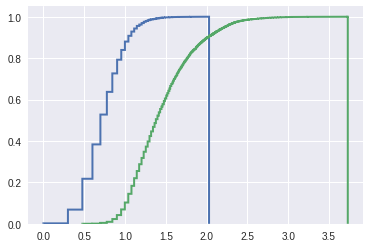

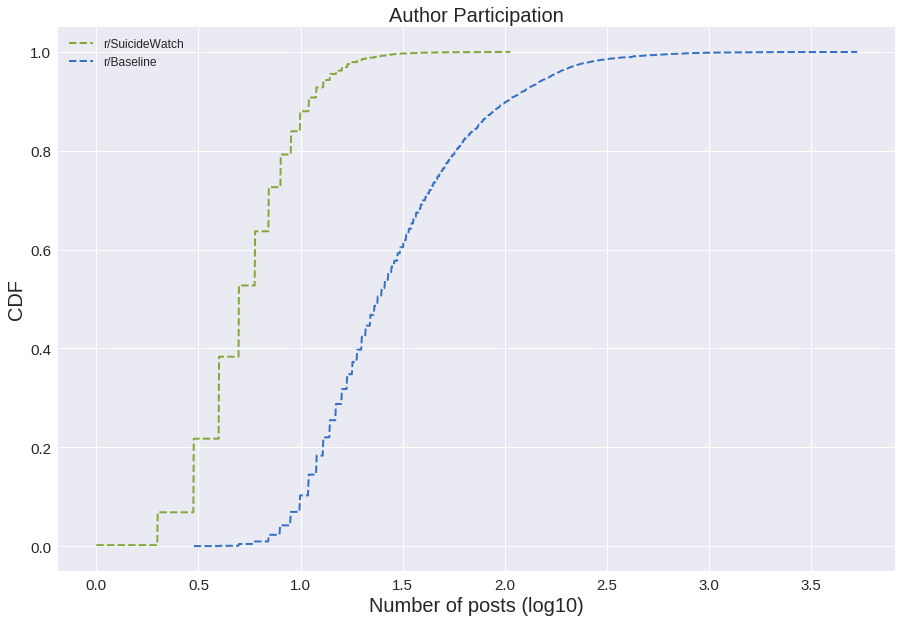

In [44]:
n1 , bins1 , patches1 = plt.hist(np.log10(authors_SW), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(authors_BL), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(bins1[:-1], n1, 'g--', linewidth=2)
ax.plot(bins2[:-1], n2, 'b--', linewidth=2)

plt.title("Author Participation", fontsize = 20)
plt.xlabel("Number of posts (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch' , 'r/Baseline'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [45]:
sortedAuths_SW = sorted(authCount_SW.items(), key=operator.itemgetter(1))

top1percent_SW = sortedAuths_SW[-(int(0.01*len(sortedAuths_SW))):-1]

top1percent_SW_auths = [k[0] for k in top1percent_SW]

print len(top1percent_SW_auths) , len(SW_mods)
print float(len(list(set(top1percent_SW_auths).intersection(set(SW_mods)))))/float(len(top1percent_SW))

113 12
0.0


In [46]:
top1percent_SW[-2]

('299vs3',
 {u'11mbro11': 1,
  u'4thinversion': 1,
  u'AbigailNormal': 1,
  u'Ash_Williams109': 1,
  u'Avelaide': 1,
  u'BanjoFatterson': 1,
  u'BlueBurbon': 1,
  u'BuffaloBuckbeak': 1,
  u'BuyMeLotsOfDiamonds': 1,
  u'CGKarkat': 1,
  u'CarolineJohnson': 1,
  u'CelestialRose': 1,
  u'ColbyJacklin': 1,
  u'CreativeHooker': 1,
  u'Cuddlesaurusrex': 1,
  u'DeLaNope': 1,
  u'Erainor': 1,
  u'EvilLittleCar': 1,
  u'Five_Bite': 1,
  u'Hegulator': 1,
  u'HereFattyFatty': 1,
  u'High0nLife': 1,
  u'Inconspicuously_here': 1,
  u'Isolation_': 1,
  u'Jhaturtle': 1,
  u'La_Fee_Verte': 1,
  u'Link_to_Zelda': 1,
  u'Meihem76': 1,
  u'Memyselfsomeotherguy': 1,
  u'Miss_anthropyy': 1,
  u'NoDakGirl': 1,
  u'Noisy_Toy': 1,
  u'PaprikaGirl': 1,
  u'Pizz_': 1,
  u'Plaguerat18': 1,
  u'Retromancer': 1,
  u'RosyPancakes': 1,
  u'SayceGards': 1,
  u'SebastionMaugris': 1,
  u'Shezzam': 1,
  u'ShiJing': 1,
  u'Shubzeh': 1,
  u'Sirocca': 1,
  u'SkeletalArcher': 1,
  u'TheDugtrio': 1,
  u'TheKnightWhoSaysEEN': 

In [47]:
sortedAuths_BL = sorted(authCount_BL.items(), key=operator.itemgetter(1))

top1percent_BL = sortedAuths_BL[-(int(0.01*len(sortedAuths_BL))):-1]

top1percent_BL_auths = [k[0] for k in top1percent_BL]

print len(top1percent_BL_auths) , len(AS_mods)
# print float(len(list(set(top1percent_BL_auths).intersection(set(AS_mods)))))/float(len(top1percent_BL))

113 2


In [48]:
top1percent_BL[-2]

(u'7yxgfz',
 {u'devicer2': 1,
  u'Cobaltjedi117': 1,
  u'sonicyouthed': 1,
  u'Malkiot': 1,
  u'agbullet': 1,
  u'Inevpatoria': 1,
  u'thisisdada': 1,
  u'snugglepea': 1,
  u'1dayHappy_1daySad': 1,
  u'HeilHilter': 1,
  u'LJ161': 1,
  u'SuckMyYaris': 1,
  u'1DarkShadowBlade': 1,
  u'Team_Braniel': 1,
  u'Takumi-Fujiwara': 1,
  u'WodtheHunter': 1,
  u'serialz1': 1,
  u'A_Silly_Pickle': 1,
  u'BrQQQ': 1,
  u'empathetical': 1,
  u'FeelDeAssTyson': 1,
  u'Piedninny17': 1,
  u'WheretheLightDies': 1,
  u'Ghost_Knife': 1,
  u'NK1337': 1,
  u'TheNumberMuncher': 1,
  u'whomad1215': 1,
  u'Physicsbitch': 1,
  u'Bnjamin10': 1,
  u'TEH_PROOFREADA': 1,
  u'Larusso92': 1,
  u'aBigBottleOfWater': 1,
  u'oss_spy': 1,
  u'Thraheg': 1,
  u'Khanstipated': 1,
  u'sCifiRacerZ': 1,
  u'justiceguy216': 1,
  u'111122223138': 1,
  u'Dedod_2': 1,
  u'Drackir': 1,
  u'blueterminal': 1,
  u'caryb': 1,
  u'jayred1015': 1,
  u'cool_weed_dad': 1,
  u'M0n5tr0': 1,
  u'Fellhuhn': 1,
  u'KJBenson': 1,
  u'smaghammer': 

In [49]:
sampled_BL[sampled_BL.keys()[19]].nodes(data=True)

[(u't1_dv2sitr',
  {'affects': 25.77,
   'author': u'Shiny_arr0wz',
   'depth': 0,
   'downs': 0,
   'text': 'l00000000l',
   'time': 1520008555.0,
   'ups': 2}),
 (u't1_dv302d0',
  {'affects': 1.0,
   'author': u'Someone9339',
   'depth': 0,
   'downs': 0,
   'text': ' #stealhislook',
   'time': 1520015525.0,
   'ups': 4}),
 (u't1_dv2zrk8',
  {'affects': 1.0,
   'author': u'Hsky12',
   'depth': 2,
   'downs': 0,
   'text': 'Yeah I was worried there for a second. 750kcal drink is insane ',
   'time': 1520015248.0,
   'ups': 3}),
 (u't1_dv3d2rn',
  {'affects': 99.0,
   'author': u'Drox01',
   'depth': 3,
   'downs': 0,
   'text': '&gt; s Yeah oh well',
   'time': 1520028018.0,
   'ups': 1}),
 (u't1_dv3epb4',
  {'affects': 25.77,
   'author': u'Tuss1n',
   'depth': 2,
   'downs': 0,
   'text': 'Is said BLACK. Not black ',
   'time': 1520029739.0,
   'ups': -3}),
 (u't1_dv3jhpi',
  {'affects': 99.0,
   'author': u'Fercopp',
   'depth': 4,
   'downs': 0,
   'text': 'Oh well in my country t

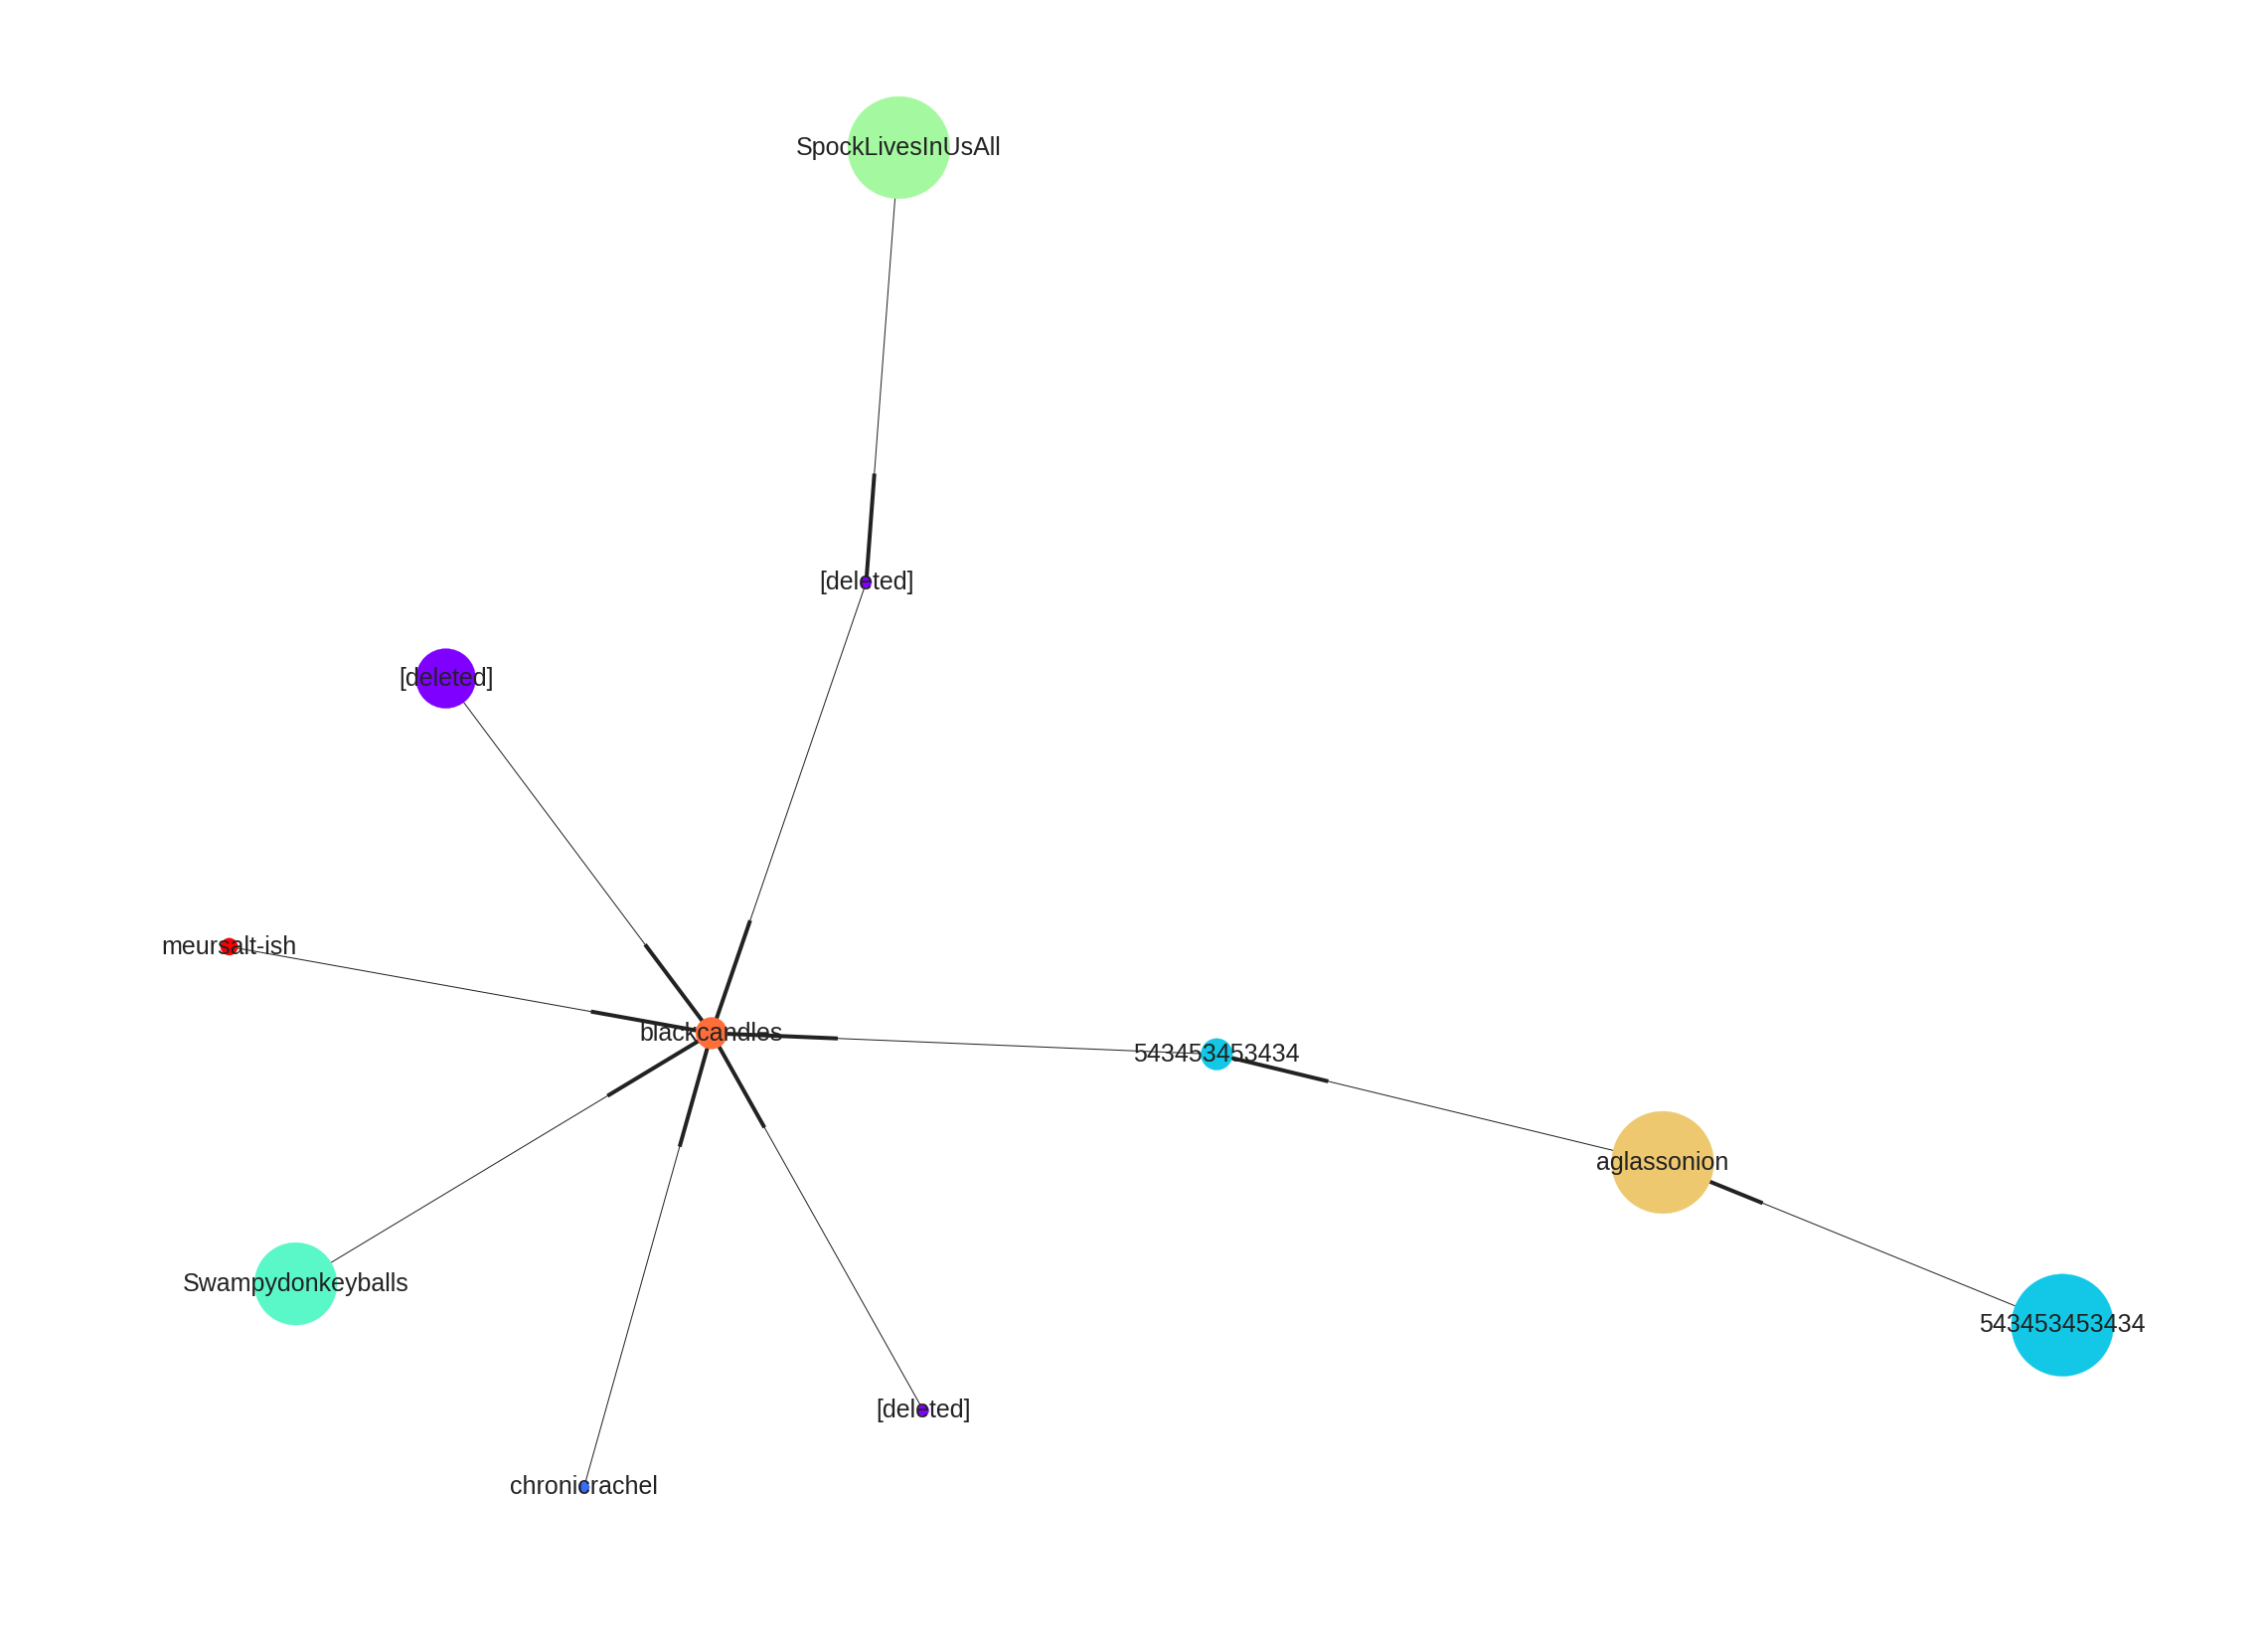

In [50]:
drawReplyGraph(sampled_SW[sampled_SW.keys()[151]])

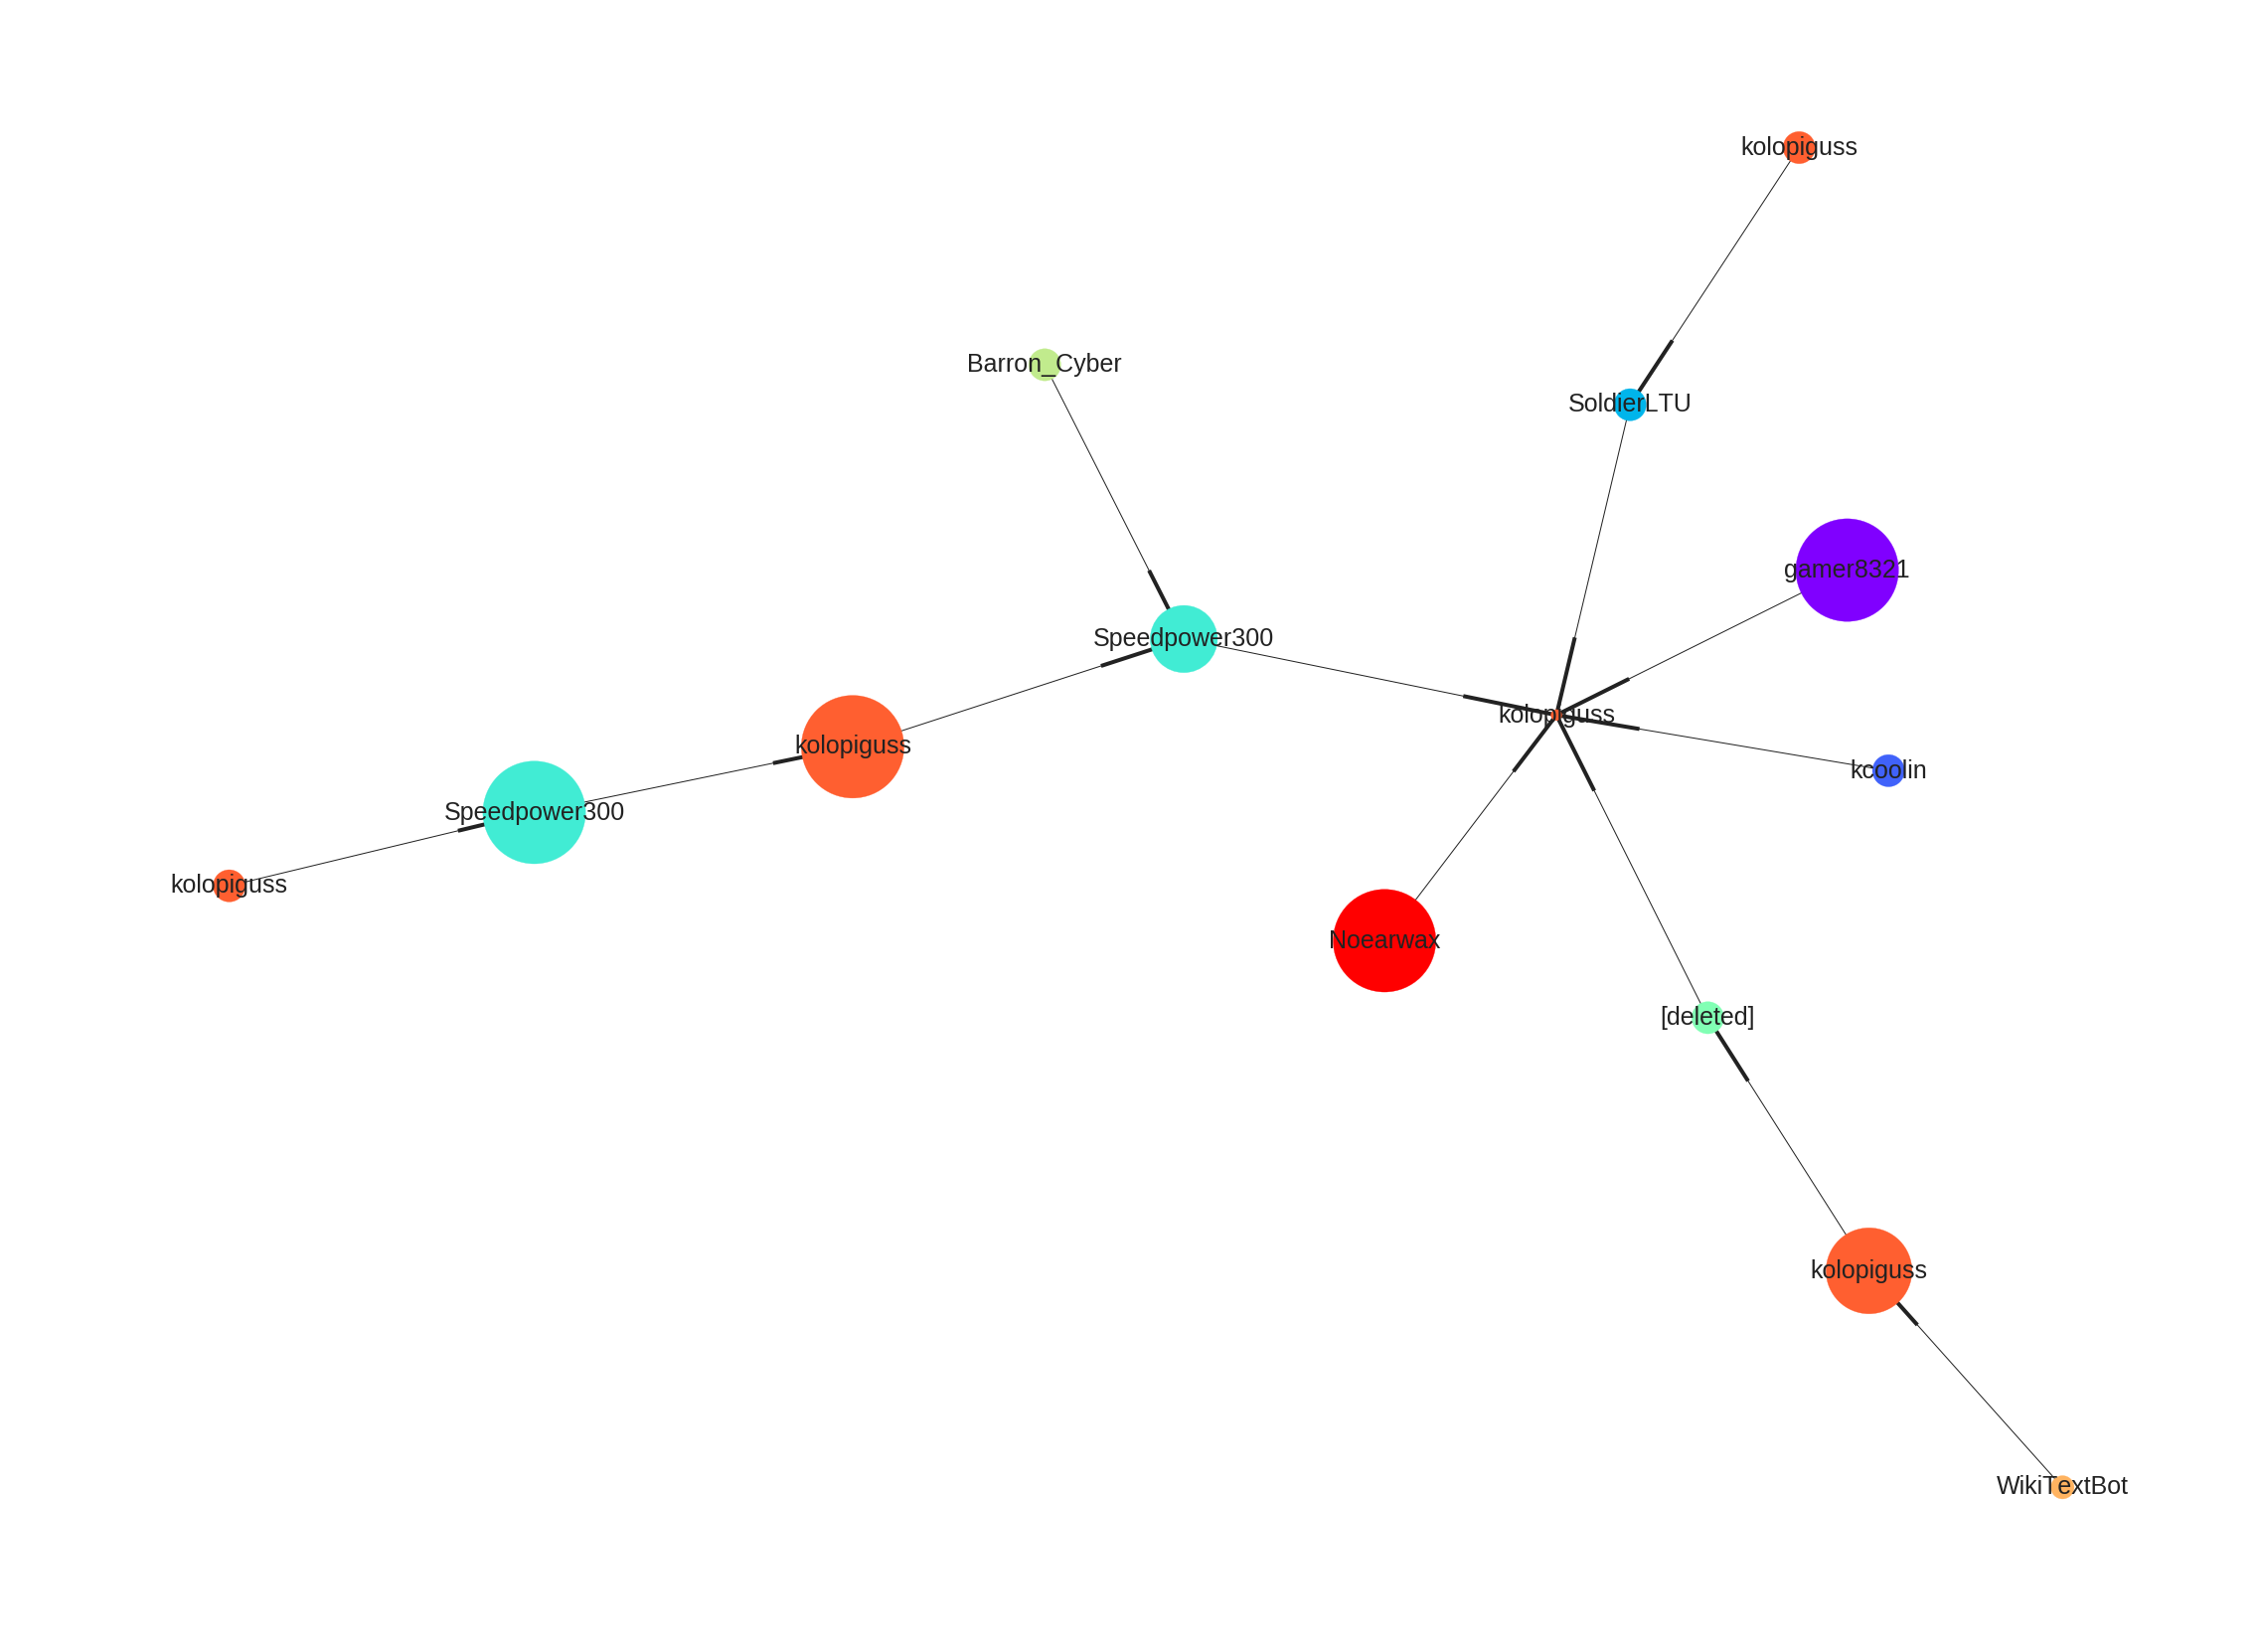

In [51]:
drawReplyGraph(sampled_BL[sampled_BL.keys()[151]])

In [52]:
userGraphs_SW = createUserGraphs(sampled_SW)

In [53]:
userGraphs_BL = createUserGraphs(sampled_BL)

In [55]:
len(userGraphs_BL), len(userGraphs_SW)

(11437, 11437)

In [57]:
def getSortedSizeDict(graphs):
    size = dict()
    for k in graphs:
        size[k] = len(graphs[k].nodes())
    sortedSizes = sorted(size.items(),key=operator.itemgetter(1))
    return sortedSizes

def getSampledResponses(replyGraphs , keys):
    responses = {}
    for k in keys:
        responses[k] = {}
        responses[k]['-1'] = tuple()
        responses[k]['0']  = []
        for n in replyGraphs[k].nodes(data=True):
            if n[1]['depth'] == -1:
                responses[k]['-1'] = n
            if n[1]['depth'] == 0:
                if n[1]['text'] != '[removed]':
                    if len(n[1]['text']) > 20:
                        responses[k]['0'].append(n)
    return responses
            
            
        

In [58]:
sortedReplyGraphs = getSortedSizeDict(sampled_SW)

In [59]:
sorted_responses= getSampledResponses(sampled_SW,[k[0] for k in sortedReplyGraphs[7000:7020]])

In [60]:
# fieldnames = ['postId', 'postDepth','author','text']
# with open("RinaSampleV2.csv", 'wb') as output_file:
#     dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
#     dict_writer.writeheader()
#     for k in sorted_responses:
#         root_resp = sorted_responses[k]['-1'][1]
#         dict_writer.writerow({'postId': k , 'postDepth': 'root' , 'author': root_resp['author'] , 'text' : root_resp['text']})
#         for r in sorted_responses[k]['0']:
#             dict_writer.writerow({'postId': k , 'postDepth': 'first_response' , 'author': r[1]['author'] , 'text' : r[1]['text']})


In [61]:
# g = (allGraphs_SW[sortedReplyGraphs[-1][0]])
# for n in g.nodes(data=True):
#      if n[1]['depth'] == 0:
#          print n

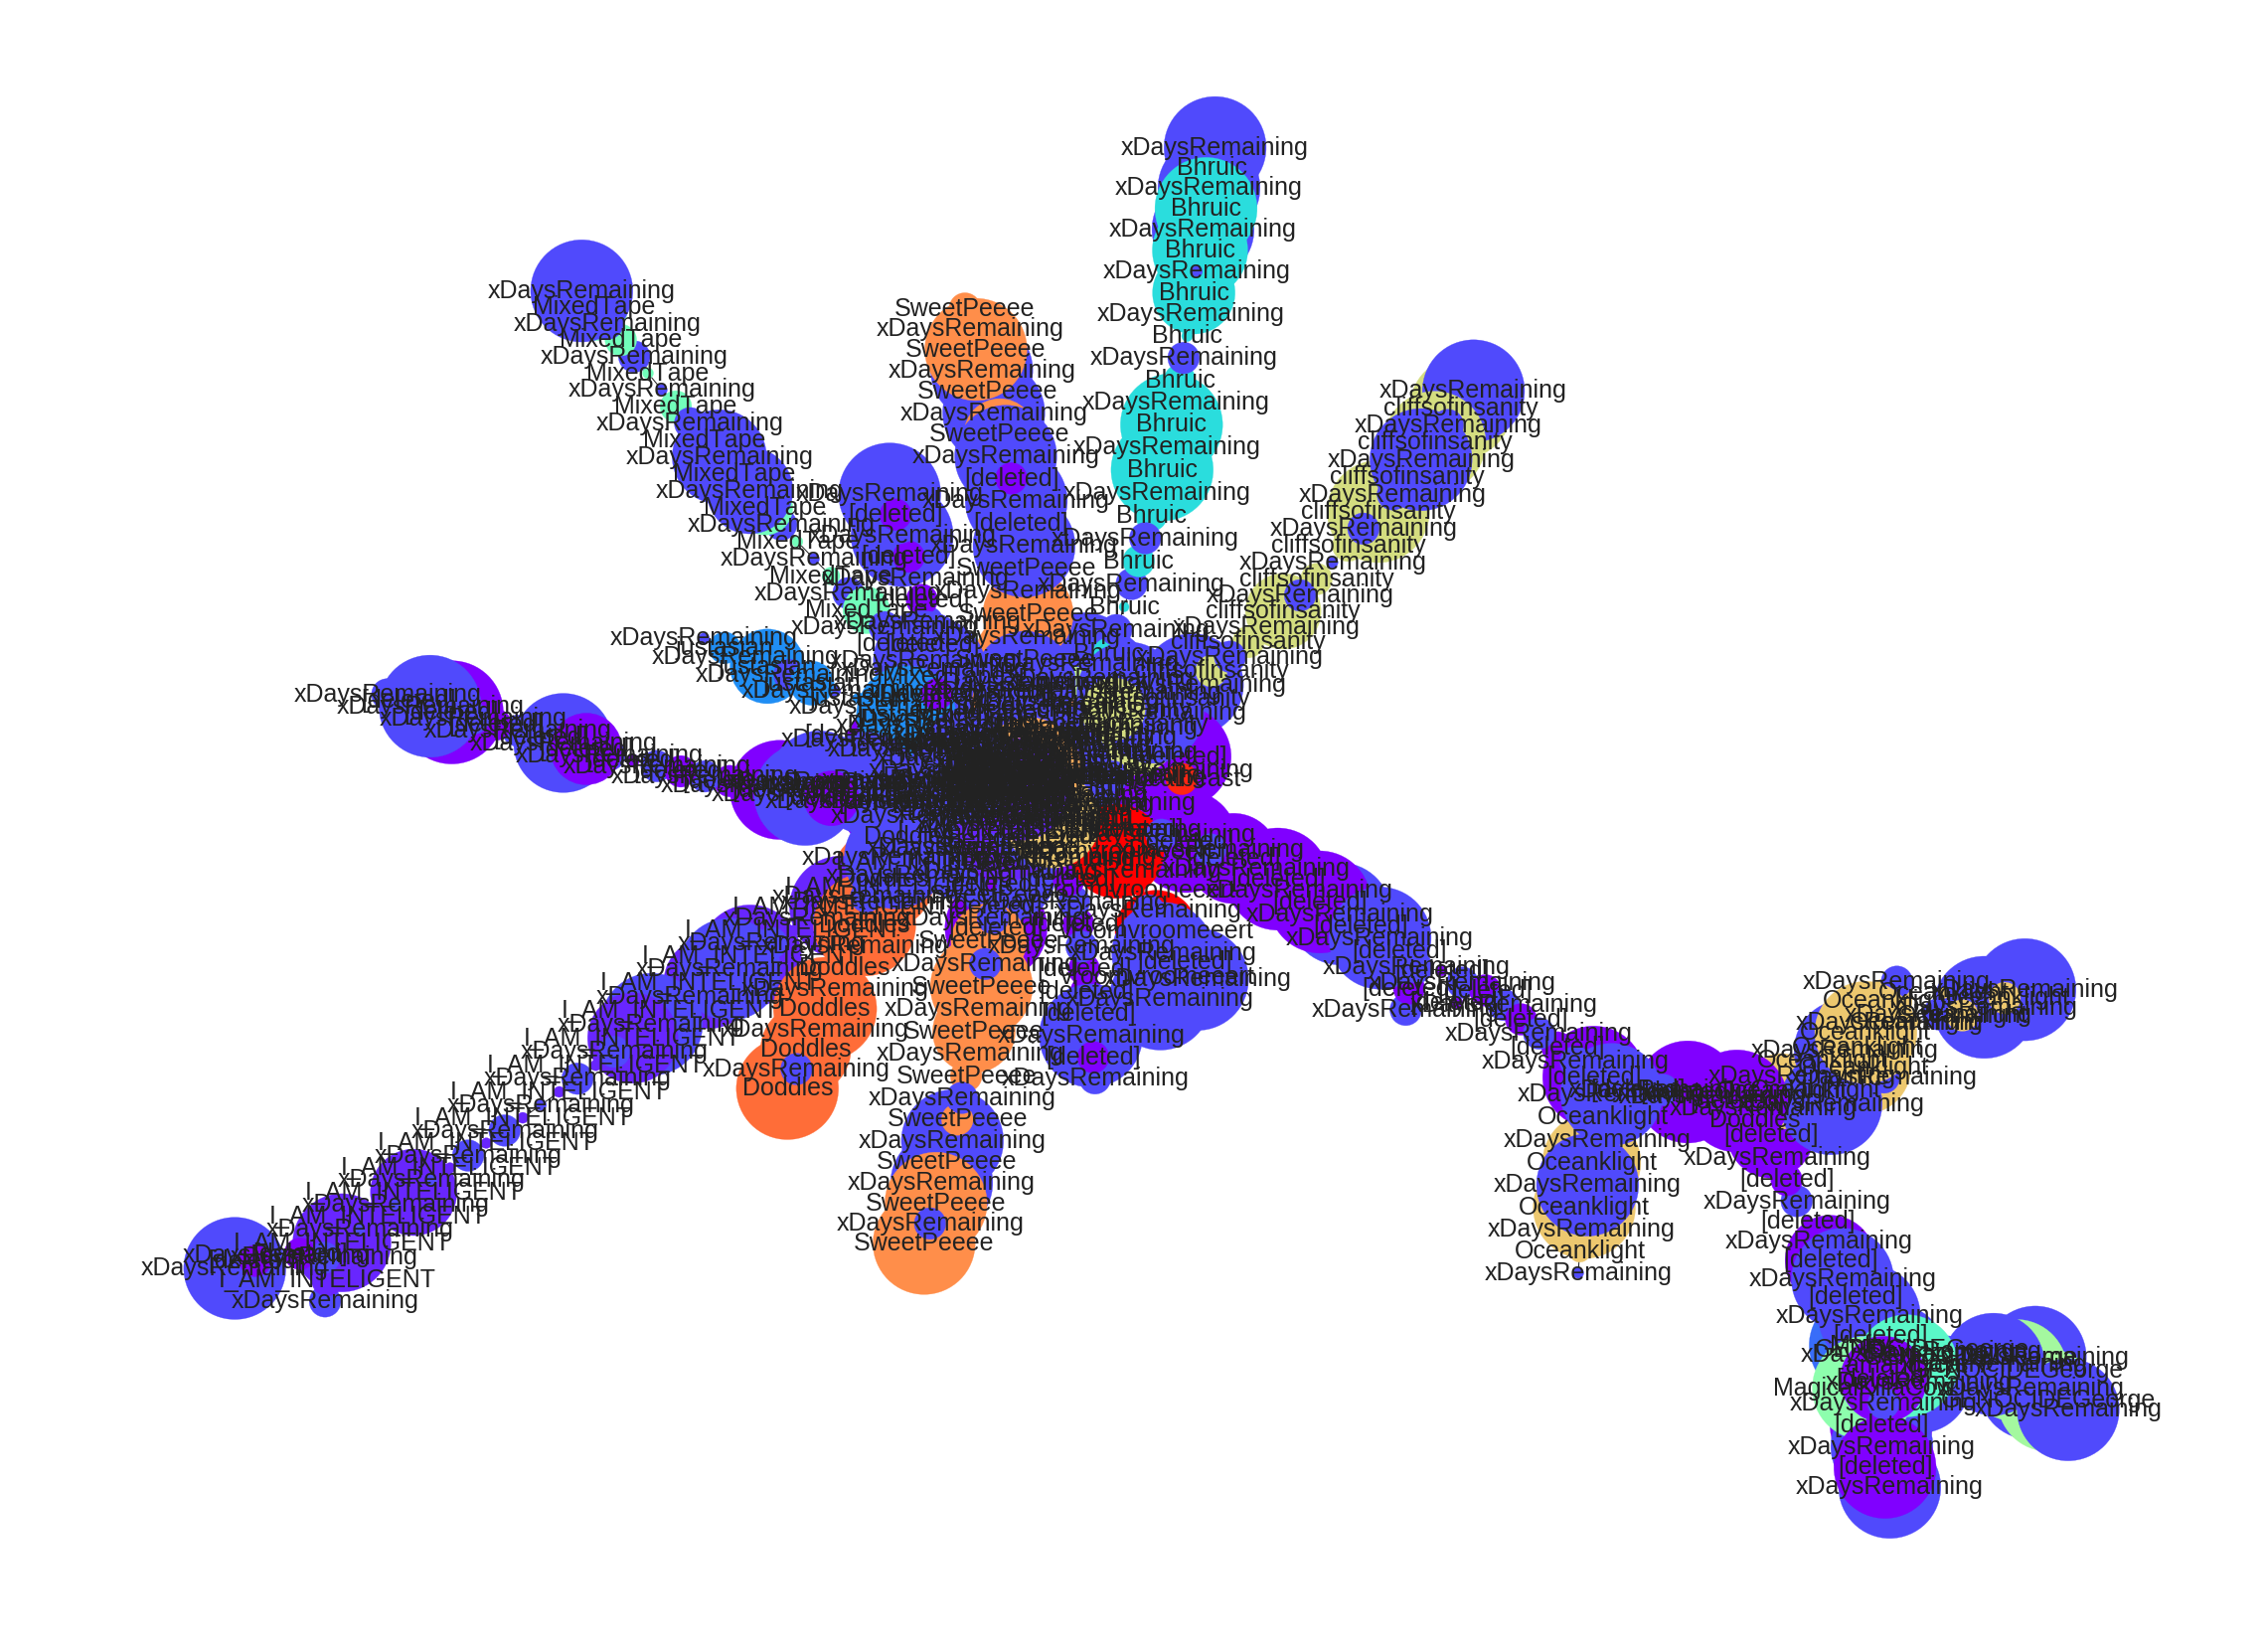

In [62]:
drawReplyGraph(sampled_SW[sortedReplyGraphs[-1][0]])

22


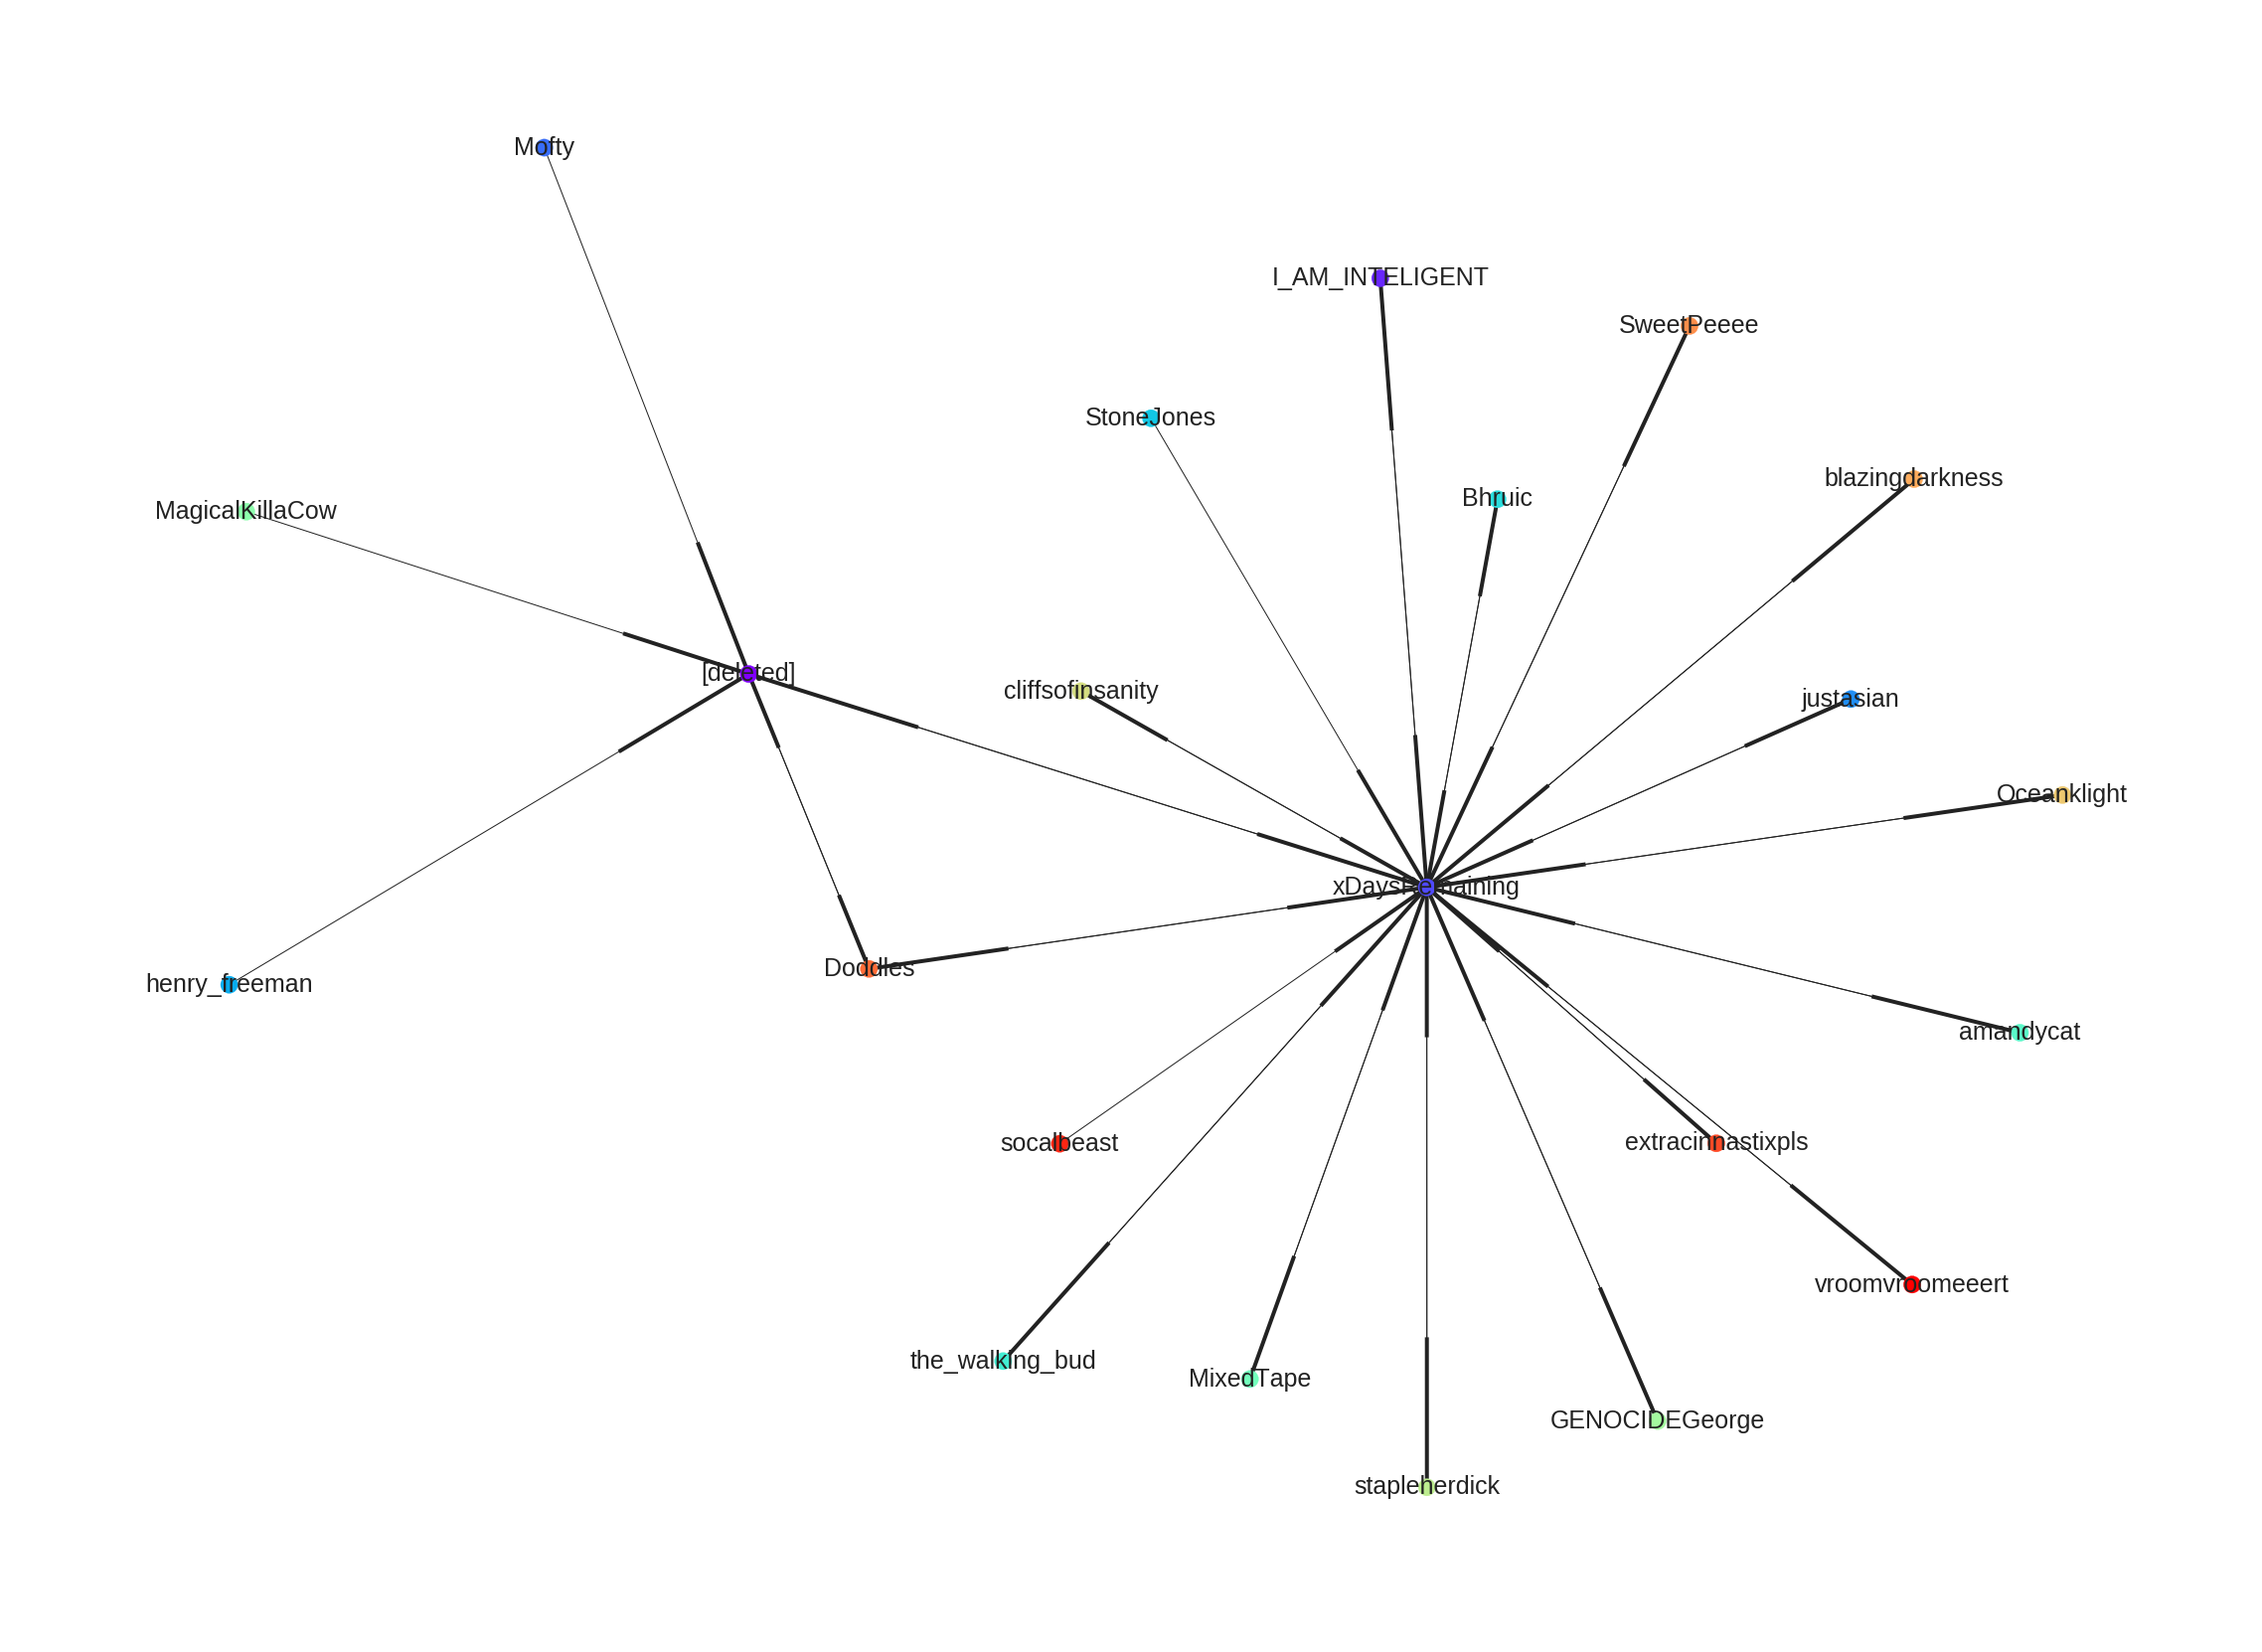

In [63]:
drawUserGraph(userGraphs_SW[sortedReplyGraphs[-1][0]])

In [64]:
# Save sampled Reply Graphs: 
# with open("../Data/SW_ReplyGraph_sampled_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=sampled_SW)

In [65]:
# with open("../Data/BL_ReplyGraph_sampled_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=allGraphs_SW)

In [66]:
#Save sampled USer Graphs: 
# with open("../Data/FrontPage/SW_ugraph_sampled_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=userGraphs_SW)

In [67]:
#Save sampled USer Graphs: 
# with open("../Data/FrontPage/FP_ugraph_sampled_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=userGraphs_BL)

33


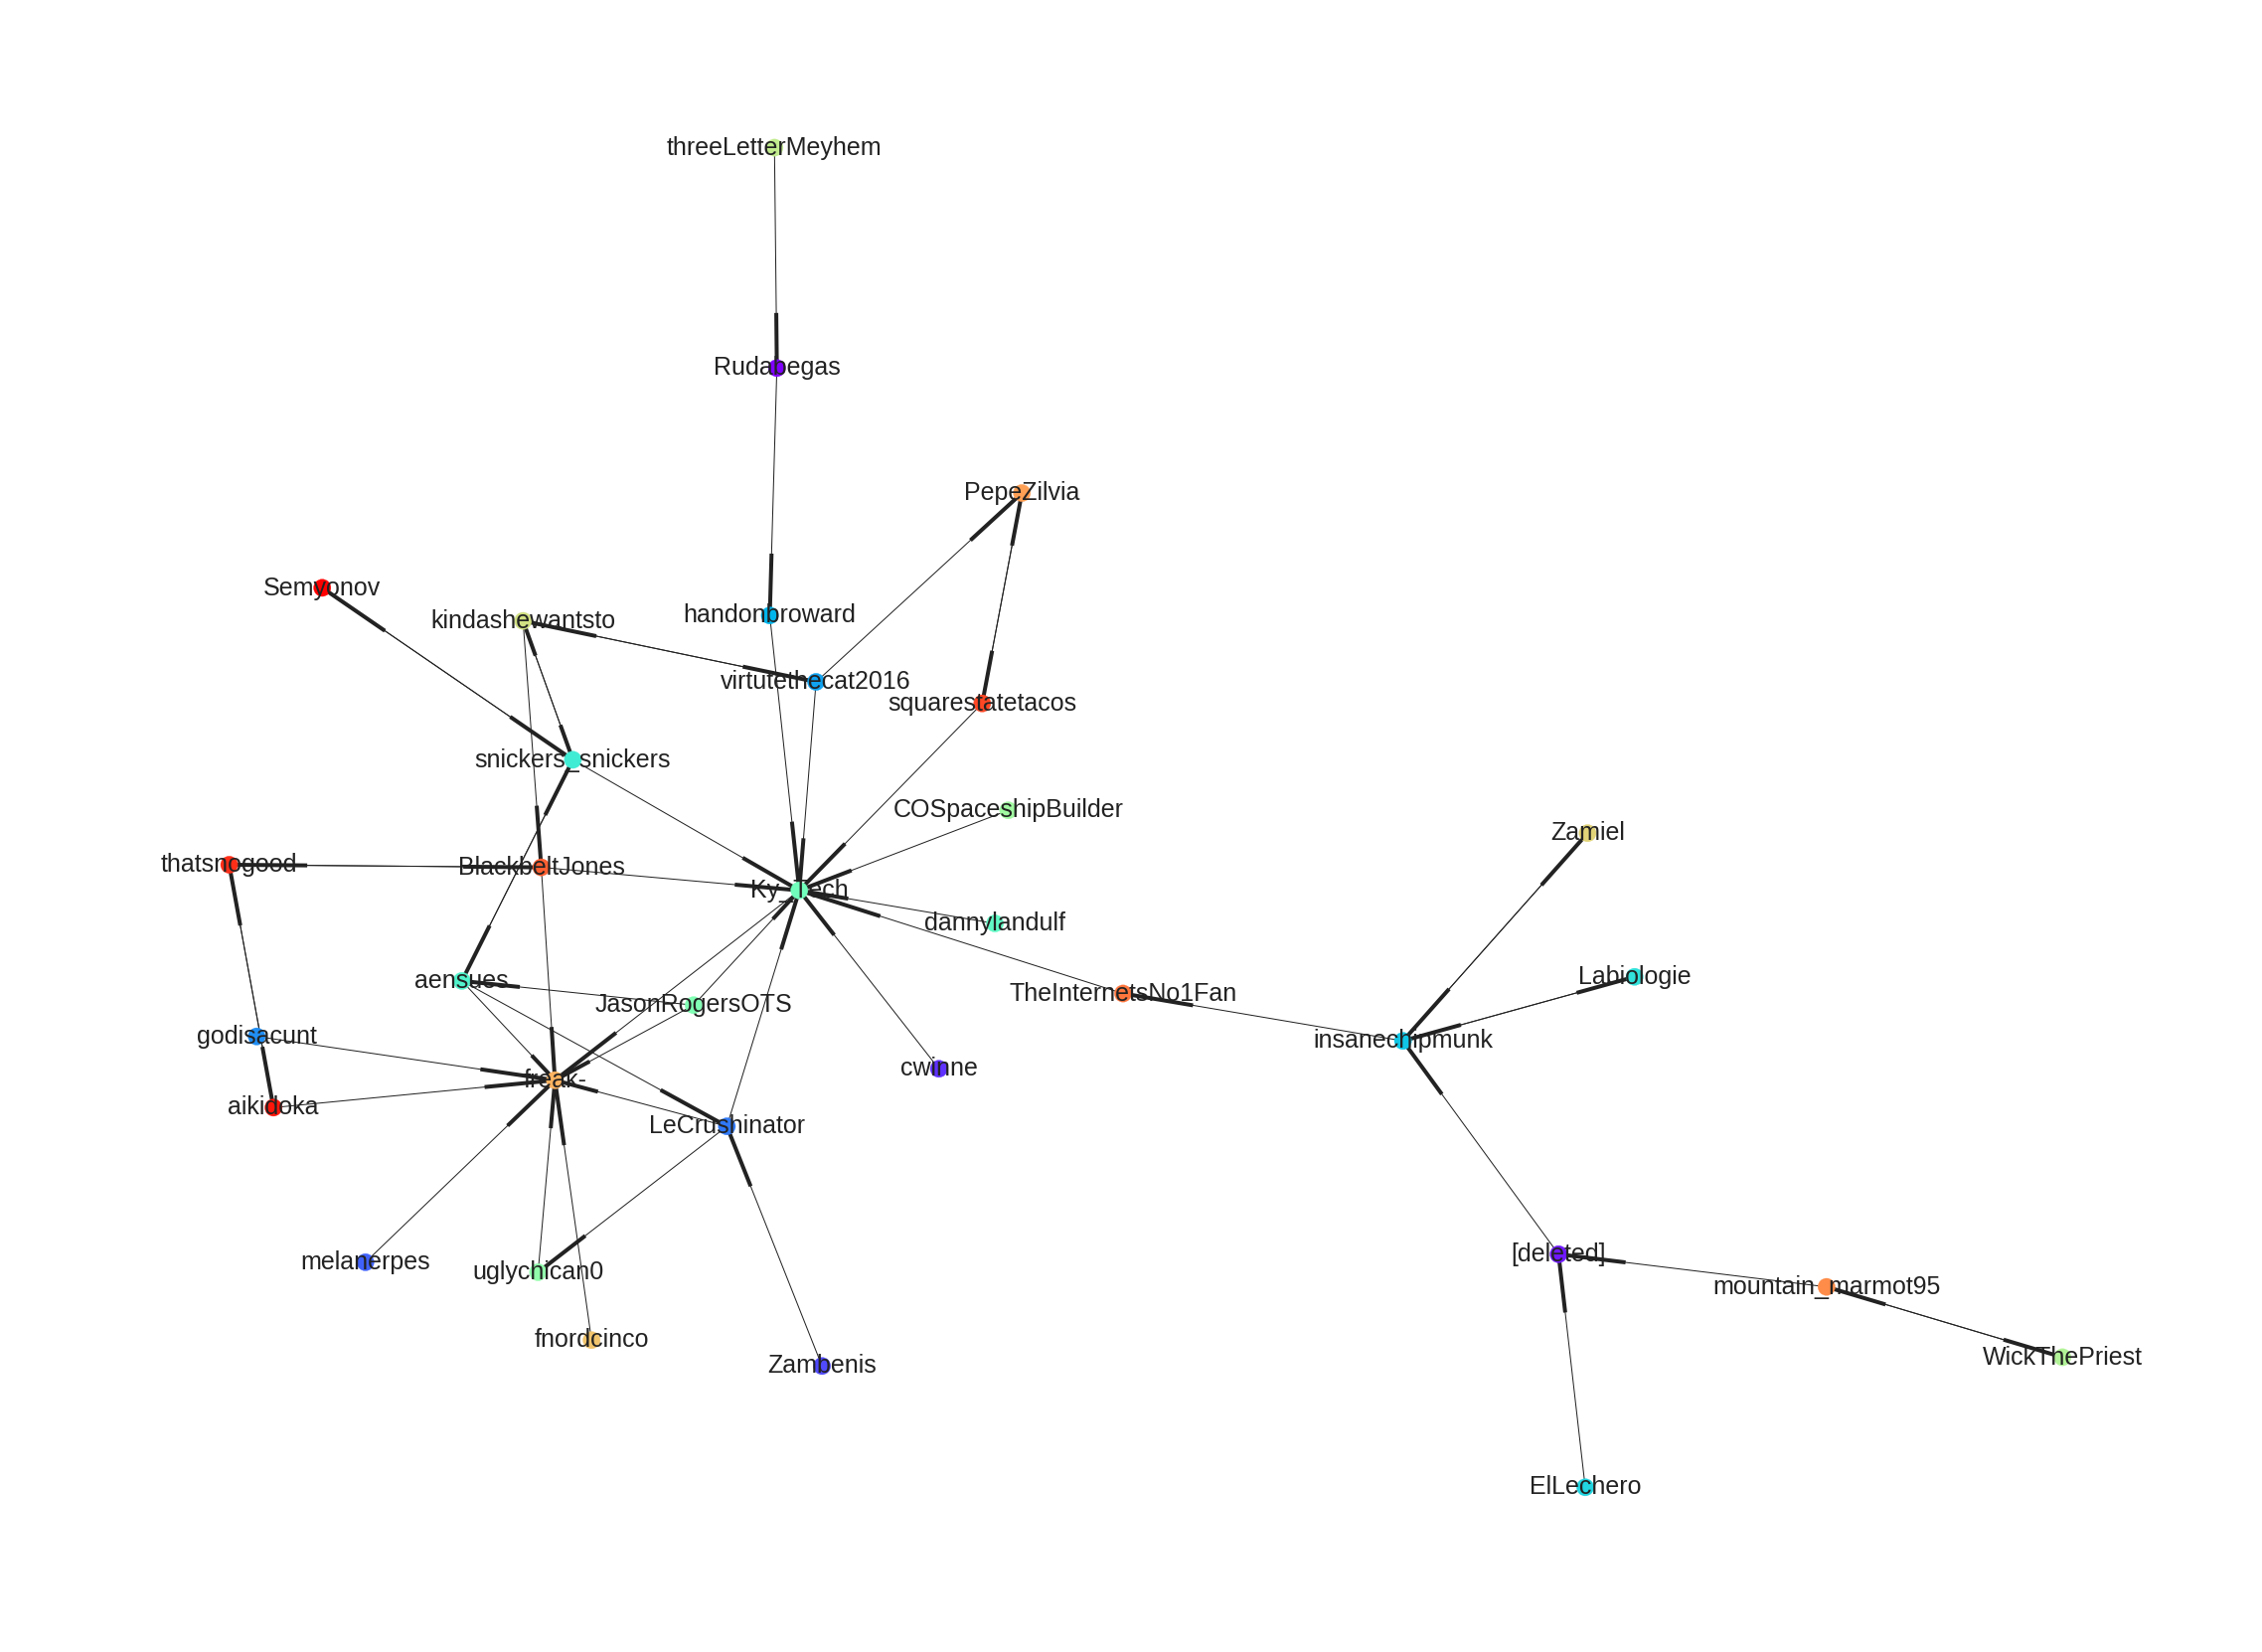

In [68]:
drawUserGraph(userGraphs_BL[sampled_BL.keys()[160]])

10


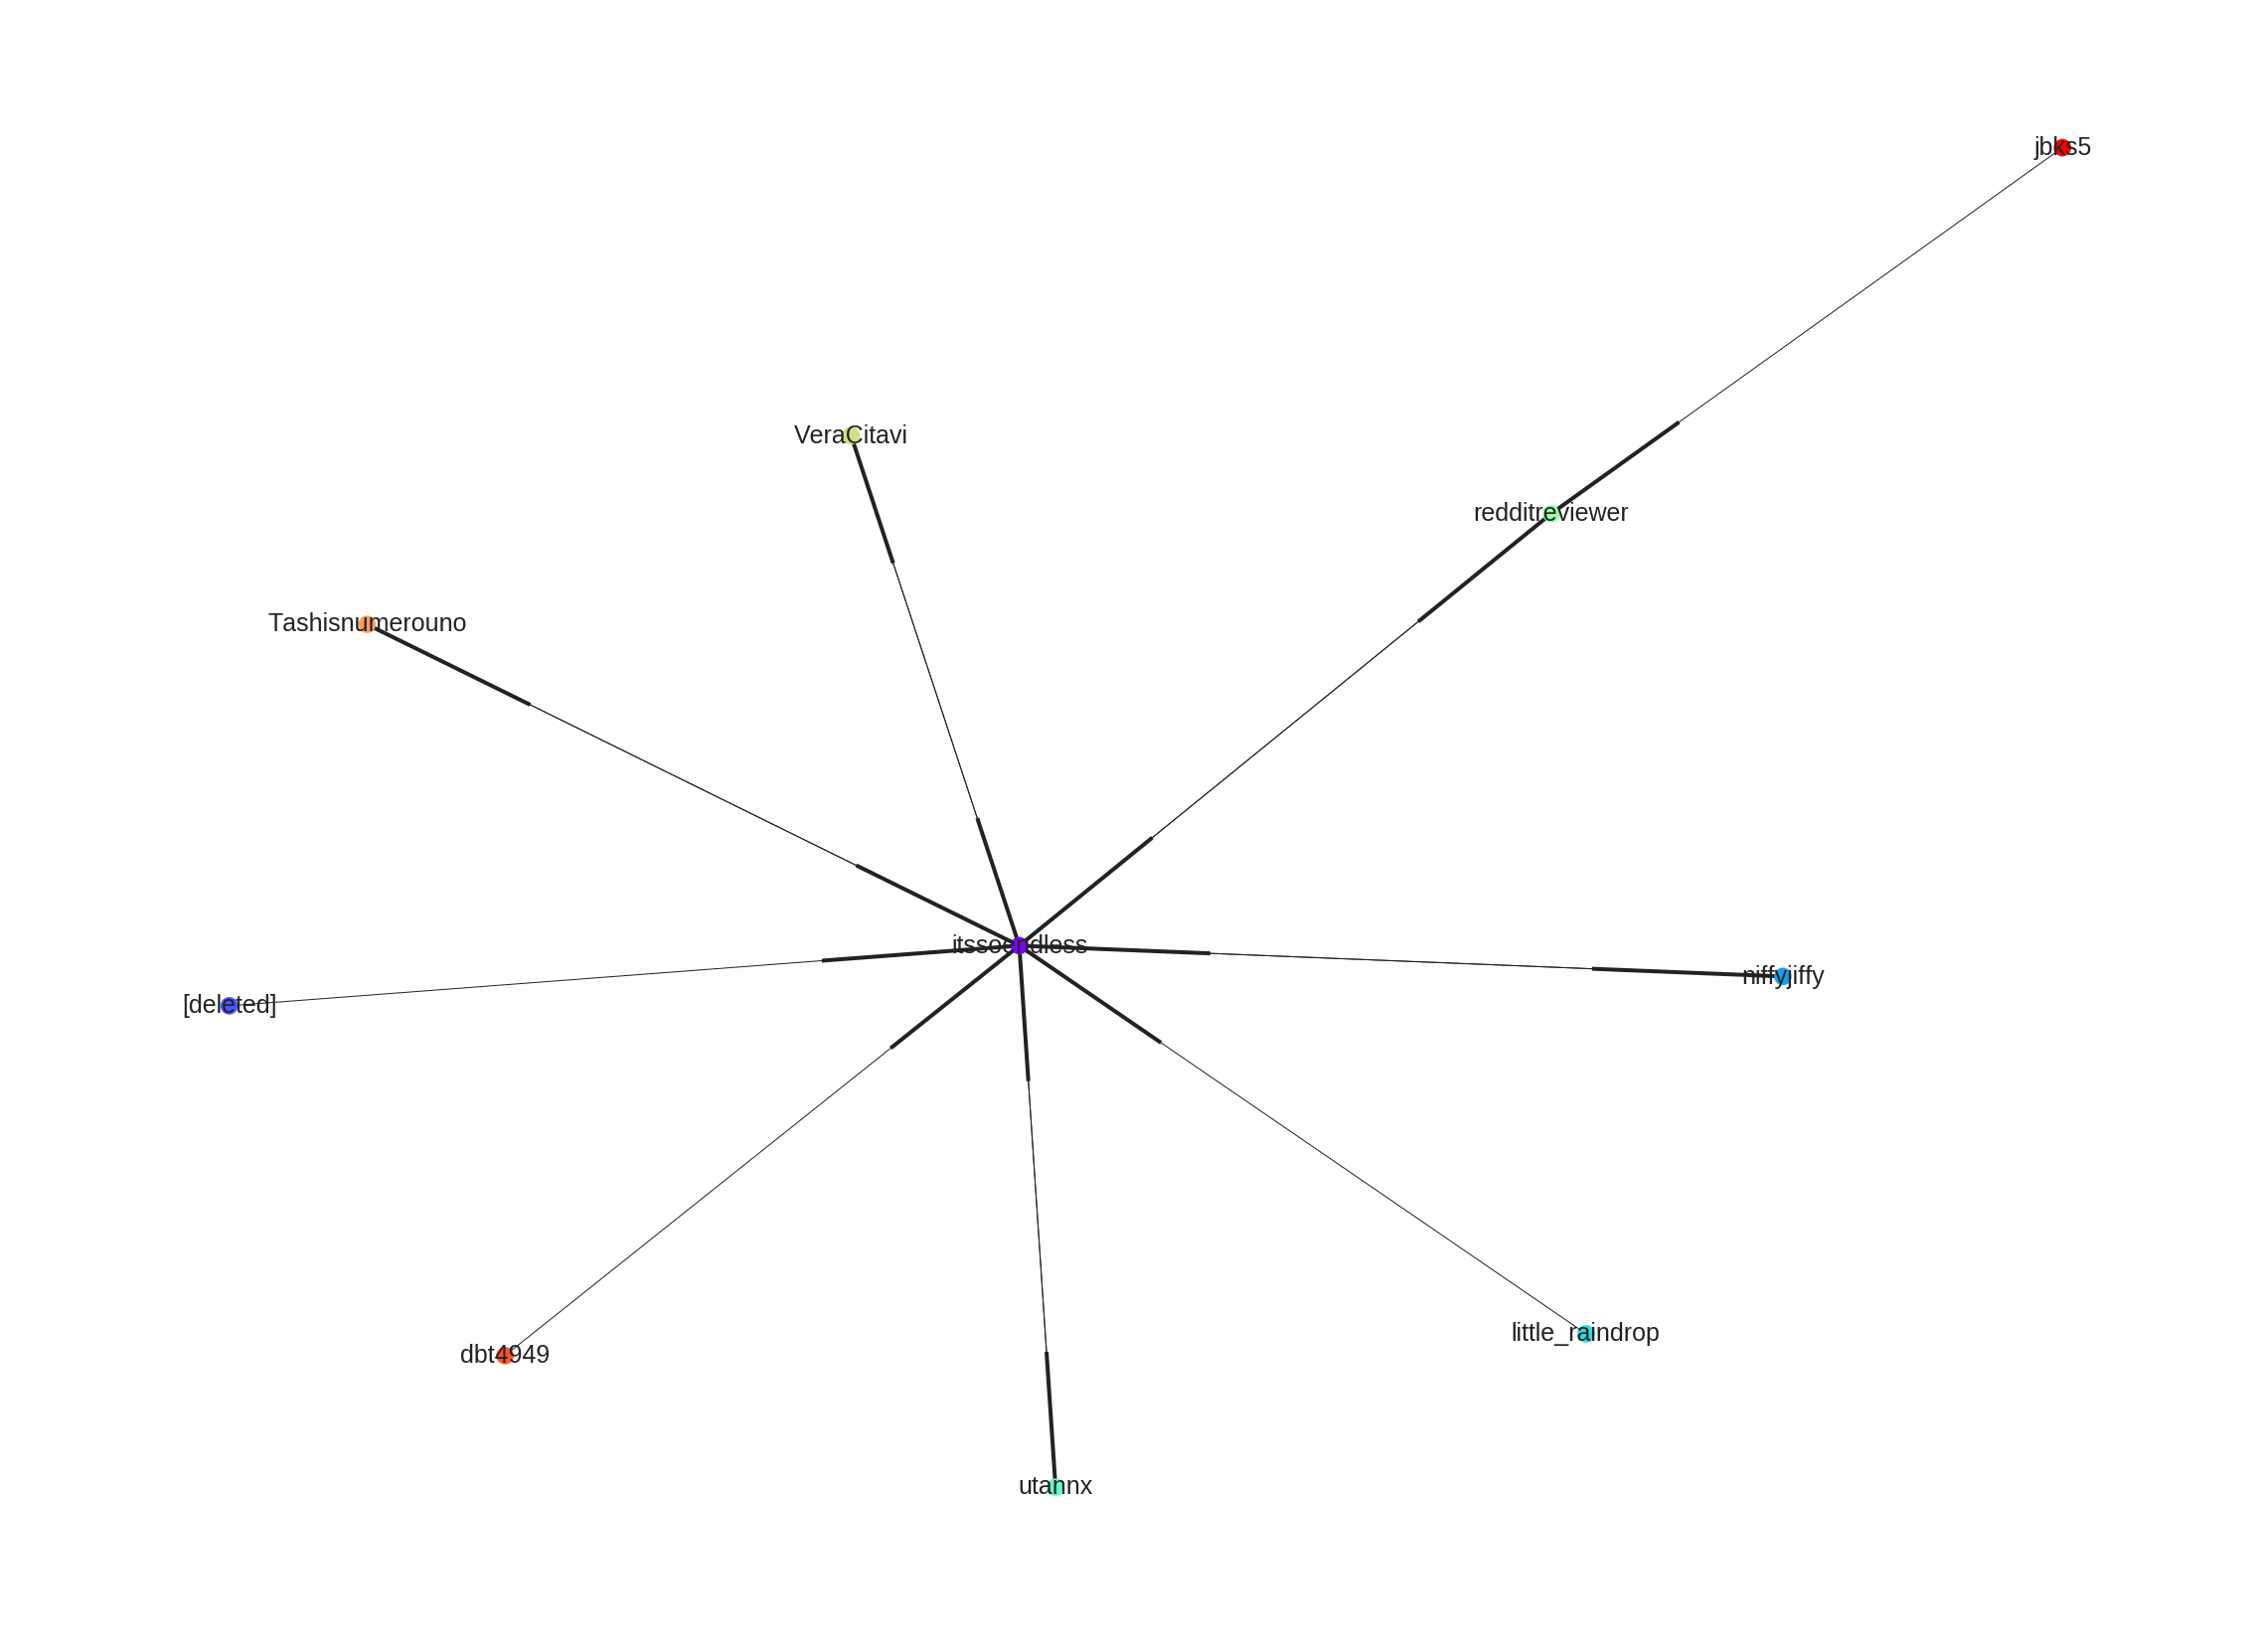

In [69]:
drawUserGraph(userGraphs_SW[sampled_SW.keys()[160]])

In [70]:
# drawUserGraph(userGraphs_BL[allGraphs_BL.keys()[1]])

In [71]:
def getRootauthors(replyGraphs):
    rootAuthors = {}
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'depth' in g.node[node]:
                if g.node[node]['depth'] == -1:
                    rootAuthors[k] =  g.node[node]['author']
    return rootAuthors

def filterDeletedOPGraphs(userGraphs,opAuthors):
    print len(opAuthors) , len(userGraphs)
    filteredUserGraphs = {}
    for g in userGraphs:
        if opAuthors[g] != '[deleted]':
            filteredUserGraphs[g] = userGraphs[g]
    return filteredUserGraphs

In [72]:
opAuthors_SW = getRootauthors(sampled_SW)
opAuthors_BL = getRootauthors(sampled_BL)

In [73]:
len(opAuthors_SW) , len(opAuthors_BL)

(11437, 11437)

In [74]:
# with open("BL_opAuthors_sampled.pkl",'w') as f:
#     pkl.dump(file=f,obj=opAuthors_BL)

In [75]:
# with open("SW_opAuthors_sampled.pkl",'w') as f:
#     pkl.dump(file=f,obj=opAuthors_SW)

In [76]:
filteredUGraphs_SW = filterDeletedOPGraphs(userGraphs_SW,opAuthors_SW)
filteredUGraphs_BL = filterDeletedOPGraphs(userGraphs_BL,opAuthors_BL)

11437 11437
11437 11437


In [77]:
print len(filteredUGraphs_BL) , len (filteredUGraphs_SW)

11070 10527


In [78]:
# Œ%store filteredUGraphs_BL

In [79]:
filteredReply_SW = {}
for k in filteredUGraphs_SW:
    filteredReply_SW[k] = sampled_SW[k]
    
filteredReply_BL = {}
for k in filteredUGraphs_BL:
    filteredReply_BL[k] = sampled_BL[k]

In [80]:
len(filteredReply_SW) , len(filteredReply_BL)

(10527, 11070)

In [81]:
#Save sampled USer Graphs: 
# with open("../Data/SW_Sampled_ugraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=sampledUgraphs_SW)
    

# with open("../Data/AS_Sampled_ugraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=filteredUGraphs_BL)

In [82]:
# with(open("SW_OpAuthors_2.pkl",'wb')) as f:
#     pkl.dump(opAuthors_SW,f)

# with(open("BL_OpAuthors_2.pkl",'wb')) as f:
#     pkl.dump(opAuthors_BL,f)

In [83]:
def getDegreeDist(graphs):
    degrees = []
    for g in graphs:
        dist = nx.degree(graphs[g]).values()
        degrees = degrees + [k+1 for k in dist]
    return degrees

def getDepths(replygraphs):
    depths = []
    for g in replygraphs:
        depth = nx.get_node_attributes(replygraphs[g],'depth')
        depths = depths + [depth[k] for k in depth]
    return depths
        

(array([-50.,   0.,  50., 100., 150., 200., 250.]),
 <a list of 7 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

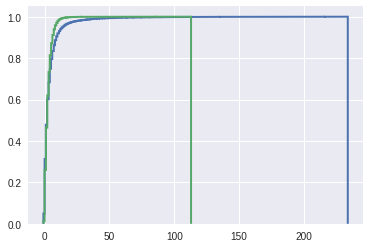

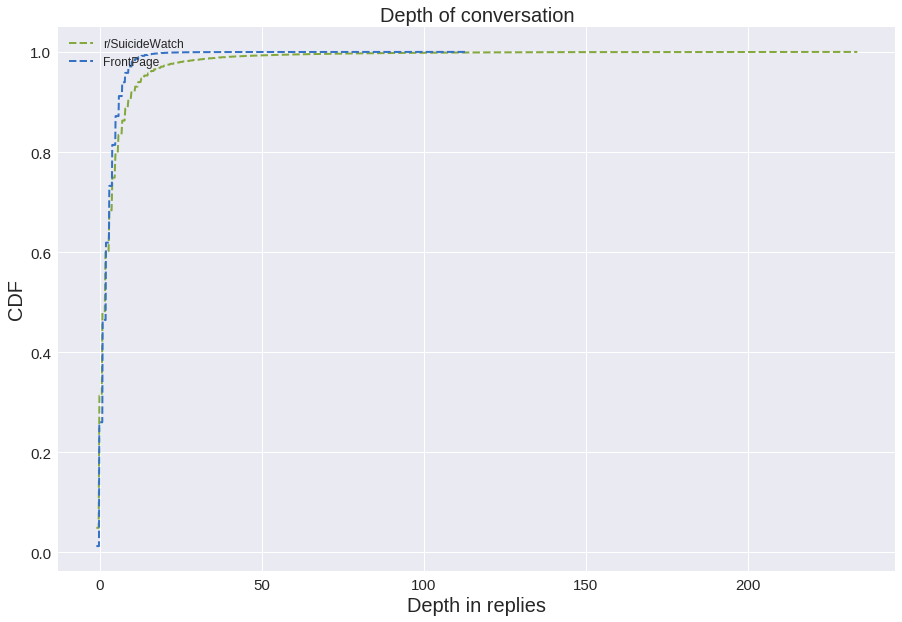

In [84]:
n1 , bins1 , patches1 = plt.hist(getDepths(filteredReply_SW), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(getDepths(filteredReply_BL), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)


fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, 'g--', linewidth=2)
ax.plot(bins2[:-1], n2, 'b--', linewidth=2)
plt.title("Depth of conversation", fontsize = 20)
plt.xlabel("Depth in replies",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','FrontPage'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [85]:
depth_SW = getDepths(filteredReply_SW)
depth_BL = getDepths(filteredReply_BL)

print np.mean(depth_SW) , np.median(depth_SW)
print np.mean(depth_BL) , np.median(depth_BL)

3.9961629665589933 2.0
2.538876252472155 2.0


In [86]:
from scipy.stats import mannwhitneyu
def findMannWhitney(vec1 , vec2):
    if len(vec1) > len(vec2):
        vec1 = random.sample(vec1 , len(vec2))
    elif len(vec2) > len(vec1): 
        vec2 = random.sample(vec2 , len(vec1))
    else:
        print "Samples are same size, no need to resample"
    statistic , pvalue = mannwhitneyu(vec1, vec2)
    return statistic, pvalue
        

In [87]:
print len(getDegreeDist(filteredReply_BL) ), len(getDegreeDist(filteredReply_SW))

stats , pvalue = findMannWhitney(getDegreeDist(filteredReply_SW) , getDegreeDist(filteredReply_BL))
normstats , normpvalue = findMannWhitney(getDegreeDist(filteredReply_SW) , getDegreeDist(filteredReply_SW))
print stats/normstats, pvalue

869181 214229
Samples are same size, no need to resample
0.8548898264052969 0.0


(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ]),
 <a list of 11 Text xticklabel objects>)

(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 <a list of 9 Text yticklabel objects>)

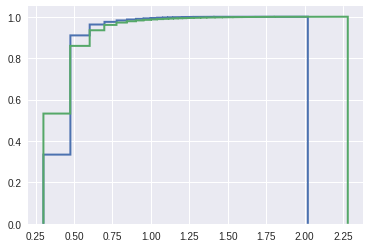

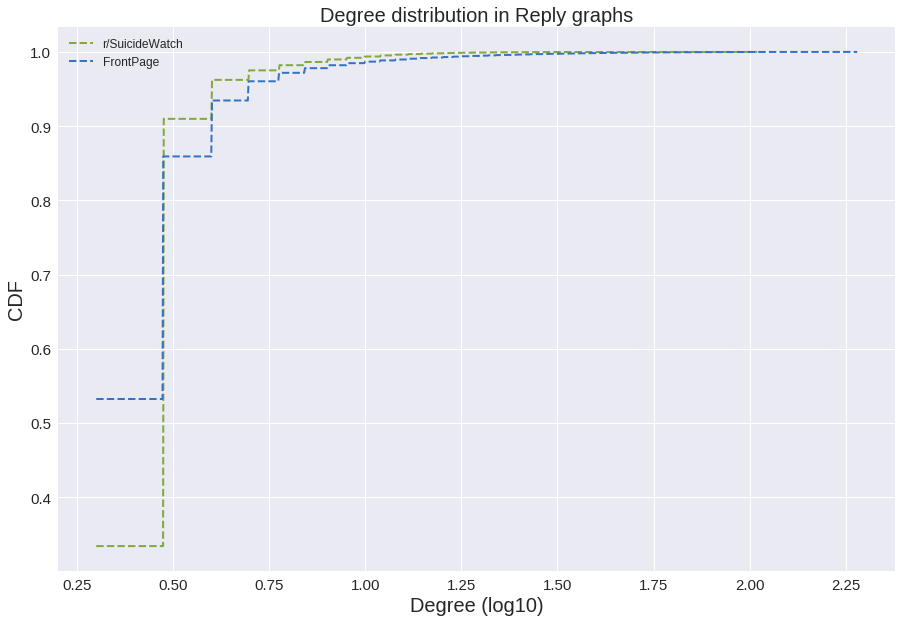

In [88]:
n1 , bins1 , patches1 = plt.hist(np.log10(getDegreeDist(filteredReply_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDegreeDist(filteredReply_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(bins1[:-1], n1, 'g--', linewidth=2)
ax.plot(bins2[:-1], n2, 'b--', linewidth=2)

plt.title("Degree distribution in Reply graphs", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','FrontPage'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 <a list of 7 Text xticklabel objects>)

(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 <a list of 9 Text yticklabel objects>)

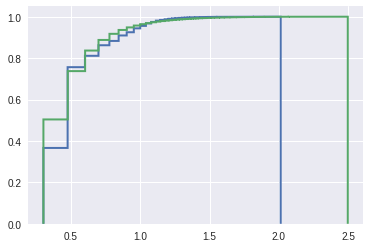

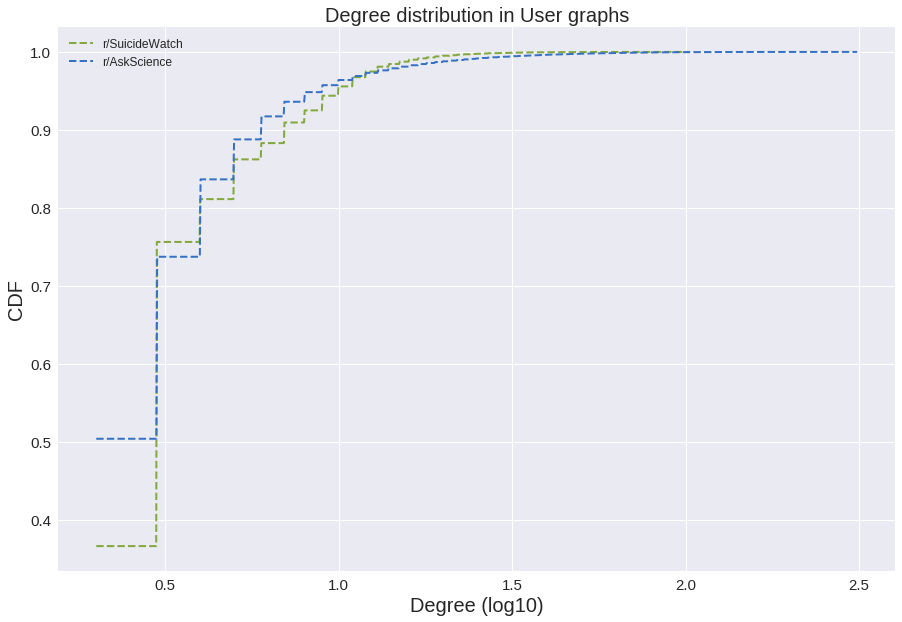

In [89]:
n1 , bins1 , patches1 = plt.hist(np.log10(getDegreeDist(filteredUGraphs_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDegreeDist(filteredUGraphs_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)


fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, 'g--', linewidth=2)
ax.plot(bins2[:-1], n2, 'b--', linewidth=2)

plt.title("Degree distribution in User graphs", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','r/AskScience'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [90]:
print len(getDegreeDist(filteredUGraphs_SW) ), len(getDegreeDist(filteredUGraphs_BL))

stats , pvalue = findMannWhitney(getDegreeDist(filteredUGraphs_SW) , getDegreeDist(filteredReply_BL))
print stats , pvalue
normstats , normpvalue = findMannWhitney(getDegreeDist(filteredUGraphs_SW) , getDegreeDist(filteredUGraphs_SW))
print stats/normstats, pvalue

68961 557200
1896566594.5 0.0
Samples are same size, no need to resample
0.7976107365717915 0.0


In [91]:


def getSymmetricBehaviour(filteredUserGraphs,opAuthors):
    messageParti = []
    userParti = []
    BPusers = {}
    for k in filteredUserGraphs:
        g = filteredUserGraphs[k]
        BPuser = 0
        BPmsges = 0

        BPusers[k] = []
        for (u,v) in g.edges():
            if u != v :          
                toMsgs = 0
                fromEdges = 0
                if v == opAuthors[k]:
                    if u in g[v]:
                        BPuser +=1
#                         print k , v , u
                        BPusers[k].append(u)
                        toMsgs = g.get_edge_data(u,v)['weight']
                        fromEdges = g.get_edge_data(v,u)['weight']
                        BPmsges= BPmsges + min(2*toMsgs,fromEdges)
        if len(g.nodes()) == 0:
#             print g.edges()
            continue
        userParti.append(float(BPuser)/float(len(g.nodes())))
        edgeWeights = sum([edge[2]['weight'] for edge in g.edges(data=True)])
        messageParti.append(float(BPmsges)/float(edgeWeights))
    return messageParti , userParti, BPusers

def getSymmetricOPResponses(replyGraphs , opAuthors):
    conversationChains = {}
    
    for k in replyGraphs:
        g = replyGraphs[k]
        authors = nx.get_node_attributes(g,'author')
        edges = g.edges()
        conversationChains[k] = {}
        conversationChains[k]['op'] = []
        conversationChains[k]['bp'] = []
        if opAuthors[k] == '[deleted]':
            continue
        for e in nx.dfs_edges(g):
            if k not in opAuthors:
                print "OP index not found"
                continue
            if e[1] not in authors or e[0] not in authors:
                print "Edge authors not found"
                continue
            if authors[e[1]] == opAuthors[k]:
                if g.node[e[1]]['text'] == '[deleted]':
                    continue
                conversationChains[k]['op'].append(g.node[e[1]])
                conversationChains[k]['bp'].append(g.node[e[0]])
    return conversationChains
                

def getTimeDistribution(replyGraphs,opAuthors):
    timeDist = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        for e in g.edges():
            if k not in opAuthors:
                print "Not the correct oplist "
                continue
            if e[1] not in authors:
                print "Author not found"
                continue
            if authors[e[1]] == opAuthors[k]:
                if e[0] in times:
                    timeDiff = times[e[0]] - times[e[1]]
                    if timeDiff == 0 or timeDiff < 0:
                        timeDiff = 1
                    timeDist.append(float(timeDiff)/60.0)
    return timeDist


def getAllTimeDifferences(replyGraphs):
    timeDiffs = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        for e in g.edges():
            if (e[0] not in times) or (e[1] not in times):
                print " Time not found"
                continue
                
            timeDiff = times[e[0]] - times[e[1]]
            if timeDiff == 0 or timeDiff < 0:
                timeDiff = 1
            timeDiffs.append(float(timeDiff)/60.0)
    return timeDiffs

def getSortedbyTimeEmotions(replyGraphs,opAuthors):
    timeDiff = []
    sentiDiff = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        sentiments = nx.get_node_attributes(g,'affects')
        opSenti = {}
        opTime = {}
        for n in g.nodes():
            if n not in authors:
                print "author not found" + n
                continue
            if authors[n] == opAuthors[k]:
                opSenti[n] = sentiments[n]
                opTime[n] = times[n]
        if len(opTime)>1:
            sortedNodes = sorted(opTime.items(), key=operator.itemgetter(1))
            if sortedNodes[-1][1] < sortedNodes[0][1]:
                print "Wrong sorting continue"
                print times[sortedNodes[-1][0]] , times[sortedNodes[0][0]]
                continue
            timeDiff.append(float(sortedNodes[-1][1] - sortedNodes[0][1]))
            sentiDiff.append(opSenti[sortedNodes[-1][0]] - opSenti[sortedNodes[0][0]])
                
    return timeDiff , sentiDiff

In [92]:
# allGraphs_SW[allGraphs_SW.keys()[100]].edges()

In [93]:
# allGraphs_SW[allGraphs_SW.keys()[1]].node['t1_cb958j2']

In [94]:
convChainsSW = getSymmetricOPResponses(sampled_SW, opAuthors_SW)

Edge authors not found


In [95]:
# print convChainsSW

In [96]:
times = nx.get_node_attributes(filteredReply_SW[filteredReply_SW.keys()[1]],'time')
sortedNodes = sorted(times.items(), key=operator.itemgetter(1))
print sortedNodes[-1][1]

1390035754.0


In [97]:
len(opAuthors_SW) , len(opAuthors_BL)

(11437, 11437)

In [98]:
SW_OPTimeDiff , SW_OPSentiDiff = getSortedbyTimeEmotions(filteredReply_SW,opAuthors_SW)

author not foundt3_g5rqg


In [99]:
BL_OPTimeDiff , BL_OPSentiDiff = getSortedbyTimeEmotions(filteredReply_BL,opAuthors_BL)

In [100]:
len(SW_OPSentiDiff)

9860

(array([-125., -100.,  -75.,  -50.,  -25.,    0.,   25.,   50.,   75.,
         100.,  125.]), <a list of 11 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

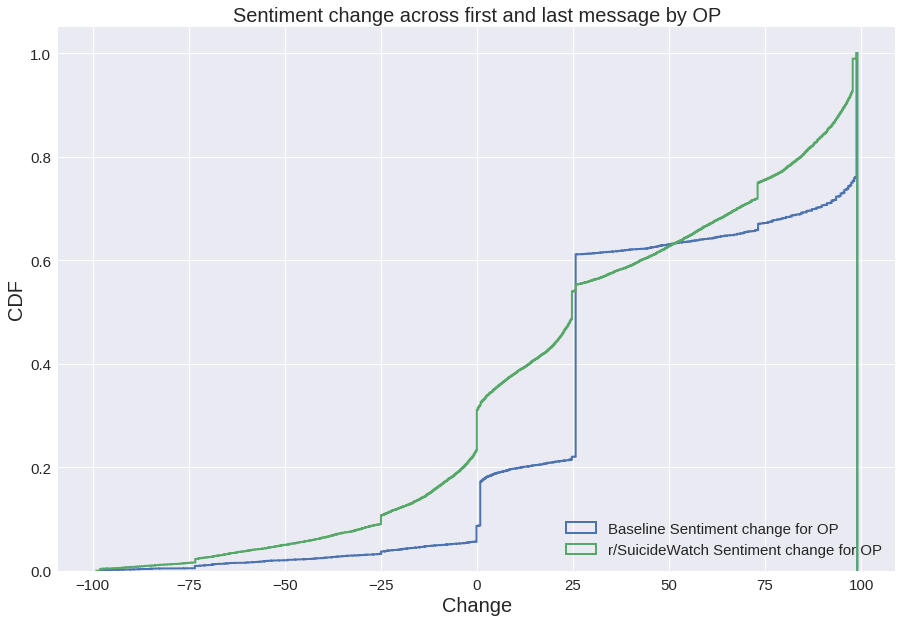

In [101]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BL_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n1 , bins1 , patches1 = plt.hist(SW_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Sentiment change across first and last message by OP", fontsize = 20)
plt.xlabel("Change",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Baseline Sentiment change for OP', 'r/SuicideWatch Sentiment change for OP' ], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [102]:
print len(BL_OPSentiDiff), len(SW_OPSentiDiff)

stats , pvalue = findMannWhitney(BL_OPSentiDiff , SW_OPSentiDiff)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_OPSentiDiff , BL_OPSentiDiff)
print stats/normstats, pvalue

7058 9860
18645741.0 2.5020105501192236e-149
Samples are same size, no need to resample
0.7485939879913354 2.5020105501192236e-149


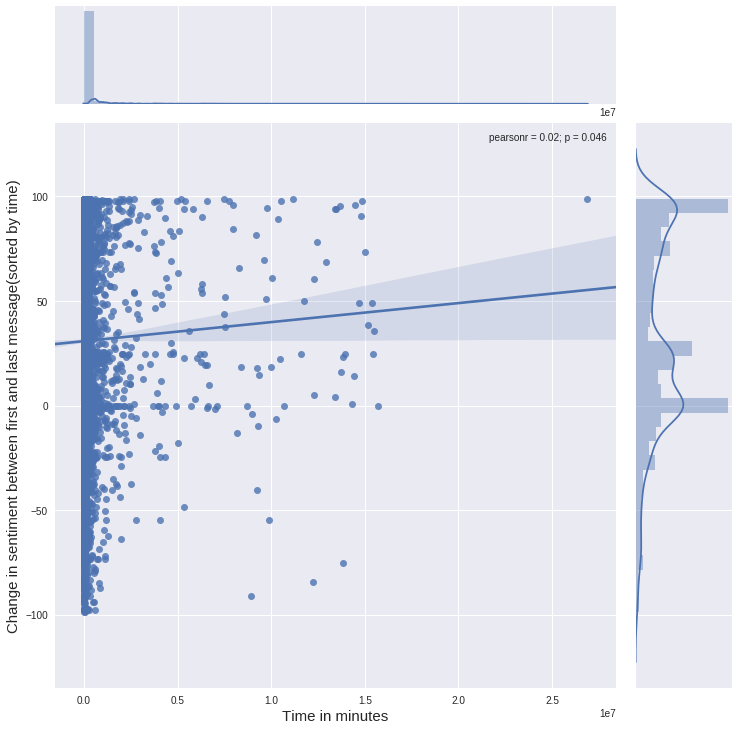

In [103]:
sns.jointplot(x = np.asarray(SW_OPTimeDiff) , y = np.asarray(SW_OPSentiDiff) , kind='reg' ,size = 10);
plt.xlabel("Time in minutes", fontsize = 15)
plt.ylabel("Change in sentiment between first and last message(sorted by time)", fontsize = 15)

In [104]:
SW_timeDist = getTimeDistribution(filteredReply_SW,opAuthors_SW)
BL_timeDist = getTimeDistribution(filteredReply_BL,opAuthors_BL)

Author not found


In [105]:
SW_AllTimeDist = getAllTimeDifferences(filteredReply_SW)
BL_AllTimeDist = getAllTimeDifferences(filteredReply_BL)

 Time not found


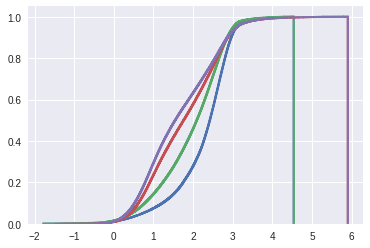

In [106]:
n1 , bins1 , patches1 = plt.hist(np.log10(BL_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(BL_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n3 , bins3 , patches3 = plt.hist(np.log10(SW_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n4 , bins4 , patches4 = plt.hist(np.log10(SW_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)


(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 11 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

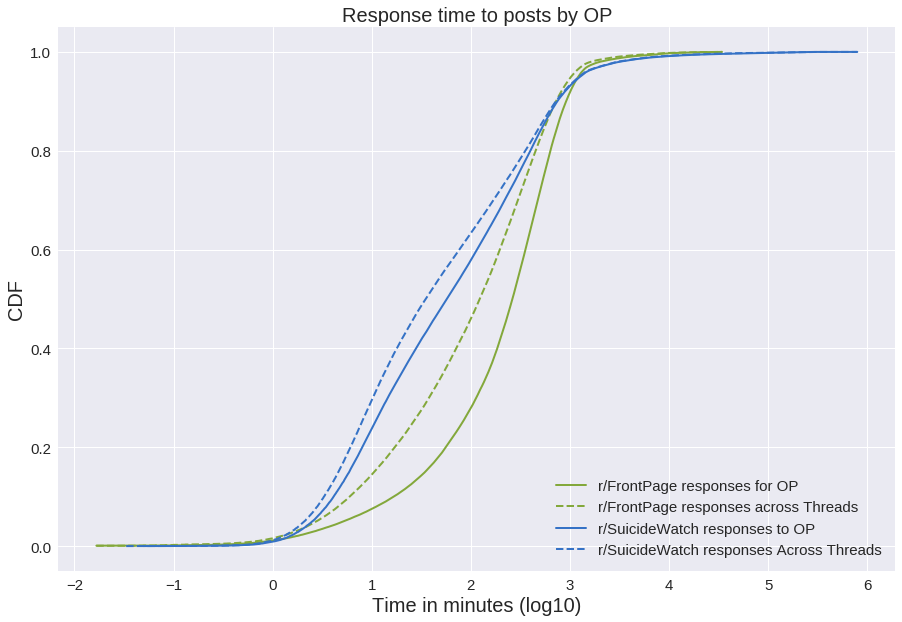

In [107]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, 'g', linewidth=2)
ax.plot(bins2[:-1], n2, 'g--', linewidth=2)
ax.plot(bins3[:-1], n3, 'b', linewidth=2)
ax.plot(bins4[:-1], n4, 'b--', linewidth=2)

plt.title("Response time to posts by OP", fontsize = 20)
plt.xlabel("Time in minutes (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/FrontPage responses for OP', 'r/FrontPage responses across Threads' , 'r/SuicideWatch responses to OP' , 'r/SuicideWatch responses Across Threads'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [108]:
BL_messageParti , BL_userParti , BL_bpusers = getSymmetricBehaviour(filteredUGraphs_BL,opAuthors_BL)


In [109]:
SW_messageParti , SW_userParti , SW_bpusers = getSymmetricBehaviour(filteredUGraphs_SW,opAuthors_SW)

In [110]:
SW_messageParti_all , SW_userParti_all, SW_bpusers_all = getSymmetricBehaviour(filteredUGraphs_SW,opAuthors_SW)

In [111]:
len(SW_bpusers_all)

10527

In [112]:
max(SW_messageParti)

0.6153846153846154

In [113]:
# BPusers['26i7k4']

In [114]:
# nx.draw_networkx(filteredUserGraphs['35flze'])

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7]),
 <a list of 9 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

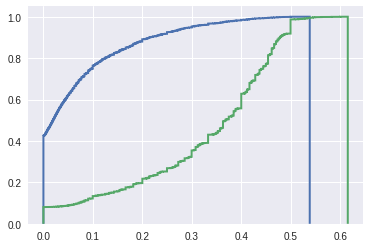

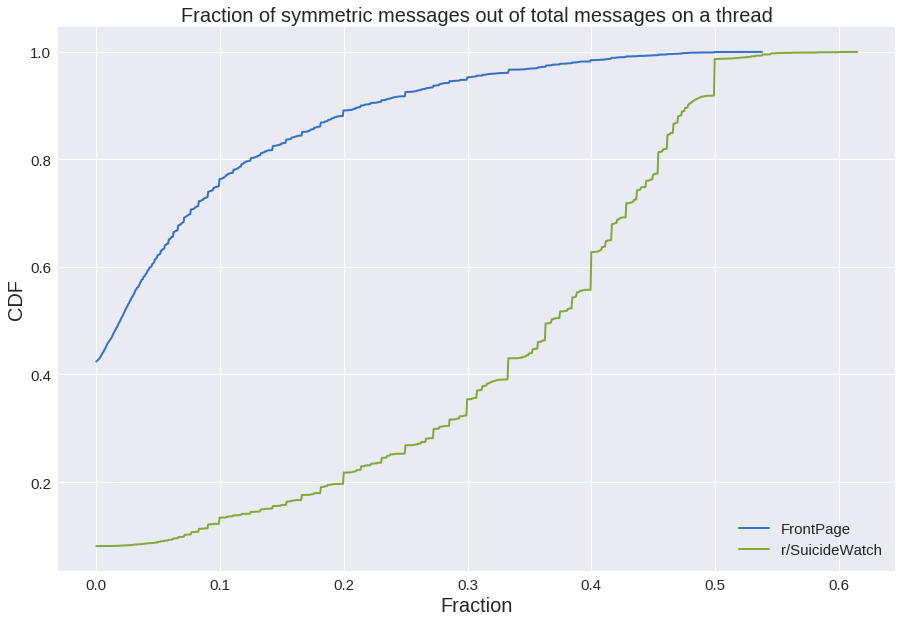

In [115]:
n1 , bins1 , patches1 = plt.hist(BL_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(SW_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, 'b', linewidth=2)
ax.plot(bins2[:-1], n2, 'g', linewidth=2)

plt.title("Fraction of symmetric messages out of total messages on a thread", fontsize = 20)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['FrontPage','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [116]:
print np.median(BL_messageParti) , np.mean(BL_messageParti)
print np.median(SW_messageParti) , np.mean(SW_messageParti)

0.019801980198019802 0.0682055934622126
0.3684210526315789 0.32513117750158615


In [117]:
print len(BL_messageParti), len(SW_messageParti)

stats , pvalue = findMannWhitney(BL_messageParti , SW_messageParti)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_messageParti , BL_messageParti)
print stats/normstats, pvalue

11070 10527
12321239.5 0.0
Samples are same size, no need to resample
0.2010893884608825 0.0


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

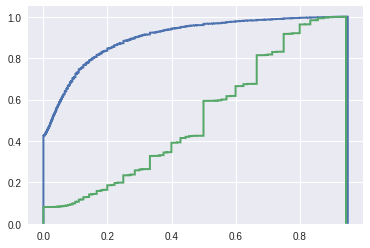

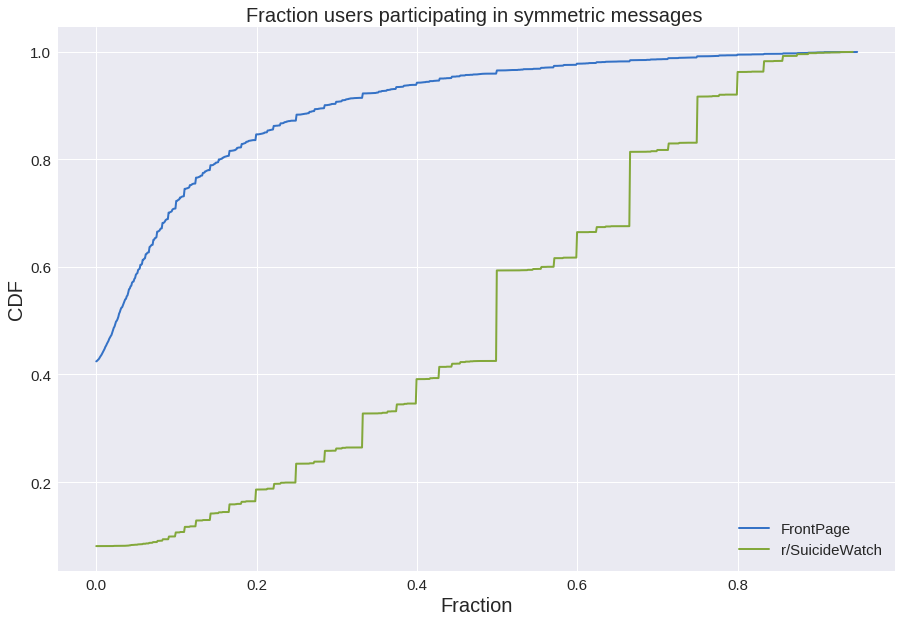

In [118]:
n1 , bins1 , patches1 = plt.hist(BL_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(SW_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(bins1[:-1], n1, 'b', linewidth=2)
ax.plot(bins2[:-1], n2, 'g', linewidth=2)

plt.title("Fraction users participating in symmetric messages ", fontsize = 20)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['FrontPage','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [119]:
print np.median(BL_userParti) , np.mean(BL_userParti)
print np.median(SW_userParti) , np.mean(SW_userParti)

0.026607669616519176 0.09440856127613712
0.5 0.4658514824184498


In [120]:
print len(BL_userParti), len(SW_userParti)

stats , pvalue = findMannWhitney(BL_userParti , SW_userParti)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_userParti , BL_userParti)
print stats/normstats, pvalue

11070 10527
13328095.0 0.0
Samples are same size, no need to resample
0.217521822613589 0.0


In [121]:
len(opAuthors_SW) , len(SW_bpusers)

(11437, 10527)

In [122]:
def getDepthEmoDist(graphs , bpUsers , opUsers):
    rootEmoDict = {}
    BPUserEmoDict = {}
    for k in bpUsers:
        if k in opUsers:
            for i , d in graphs[k].nodes(data=True):
                if 'author' in d:
                    if d['author'] == opUsers[k]:
                        depth = d['depth']
                        if depth not in rootEmoDict:
                            rootEmoDict[depth] = []
                        rootEmoDict[depth].append(d['affects'])
                    elif d['author'] in bpUsers[k]:
                        depth = d['depth']
                        if depth not in BPUserEmoDict:
                            BPUserEmoDict[depth] = []
                        BPUserEmoDict[depth].append(d['affects'])
    return rootEmoDict , BPUserEmoDict

def getMeanError(emoDict, depthMax):
    MeanAffects =[]
    Error = []
    for k in range(0,depthMax):
        if k in emoDict:
            MeanAffects.append(np.mean(emoDict[k]))
            Error.append(np.std(emoDict[k])/float(len(emoDict[k])))
        else:
            print len(MeanAffects)
            MeanAffects.append(MeanAffects[-1])
            Error.append(Error[-1])
    return MeanAffects , Error


# def get

In [123]:
SW_rootEmoDict , SW_bpUserEmoDict = getDepthEmoDist(filteredReply_SW,SW_bpusers,opAuthors_SW)


In [124]:
SW_rootMean , SW_rootError = getMeanError(SW_rootEmoDict,50)


In [125]:
SW_BPMean , SW_BPError = getMeanError(SW_bpUserEmoDict,50)
print len(SW_rootMean) , len(SW_rootError) , len(SW_BPError) , len(SW_BPMean)

50 50 50 50


In [126]:
len(SW_bpUserEmoDict[0])

29133

In [127]:
BL_rootEmoDict , BL_bpUserEmoDict = getDepthEmoDist(filteredReply_BL,BL_bpusers,opAuthors_BL)
BL_rootMean , BL_rootError = getMeanError(BL_rootEmoDict,50)
BL_BPMean , BL_BPError = getMeanError(BL_bpUserEmoDict,50)
print len(BL_rootMean) , len(BL_rootError) , len(BL_BPMean) , len(BL_BPError)

24
26
28
30
31
32
33
34
36
37
38
39
40
41
42
43
44
45
46
47
48
49
44
46
48
50 50 50 50


In [128]:
# sns.distplot(rootEmoDict[7])

<Container object of 3 artists>

<Container object of 3 artists>

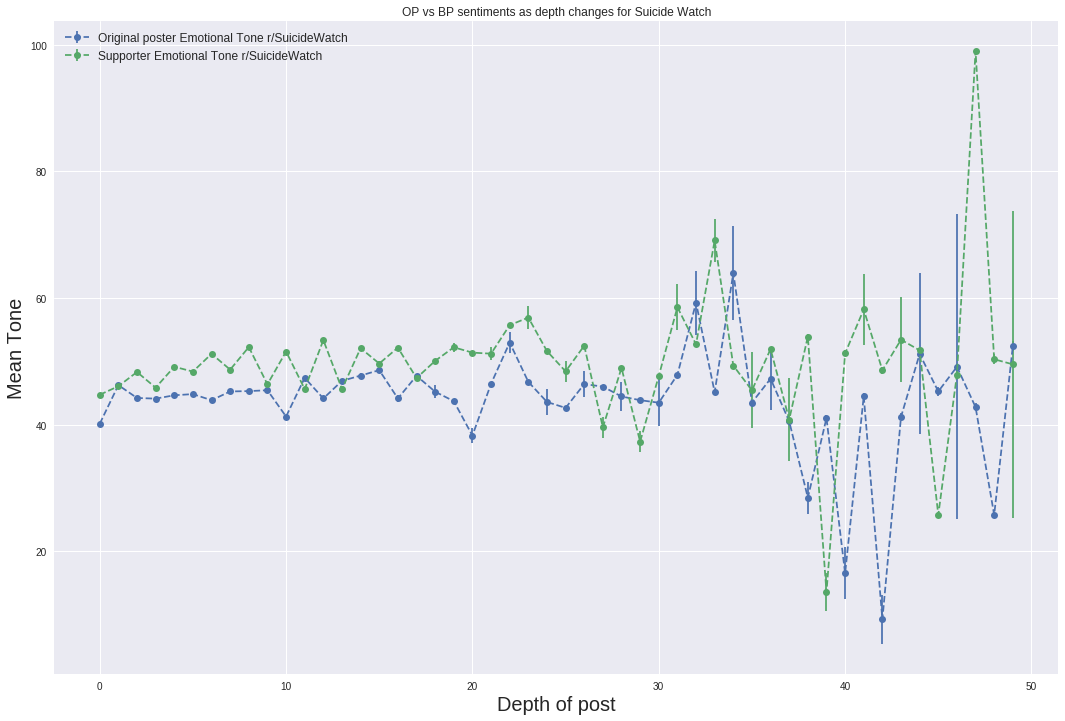

In [129]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(0, 50, 1),SW_rootMean , yerr=SW_rootError, fmt='--o')
ax.errorbar(np.arange(0, 50, 1),SW_BPMean , yerr=SW_BPError, fmt='--o')
plt.title("OP vs BP sentiments as depth changes for Suicide Watch")
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Tone" , fontsize = 20)
plt.legend(['Original poster Emotional Tone r/SuicideWatch','Supporter Emotional Tone r/SuicideWatch'],fontsize=12)

<Container object of 3 artists>

<Container object of 3 artists>

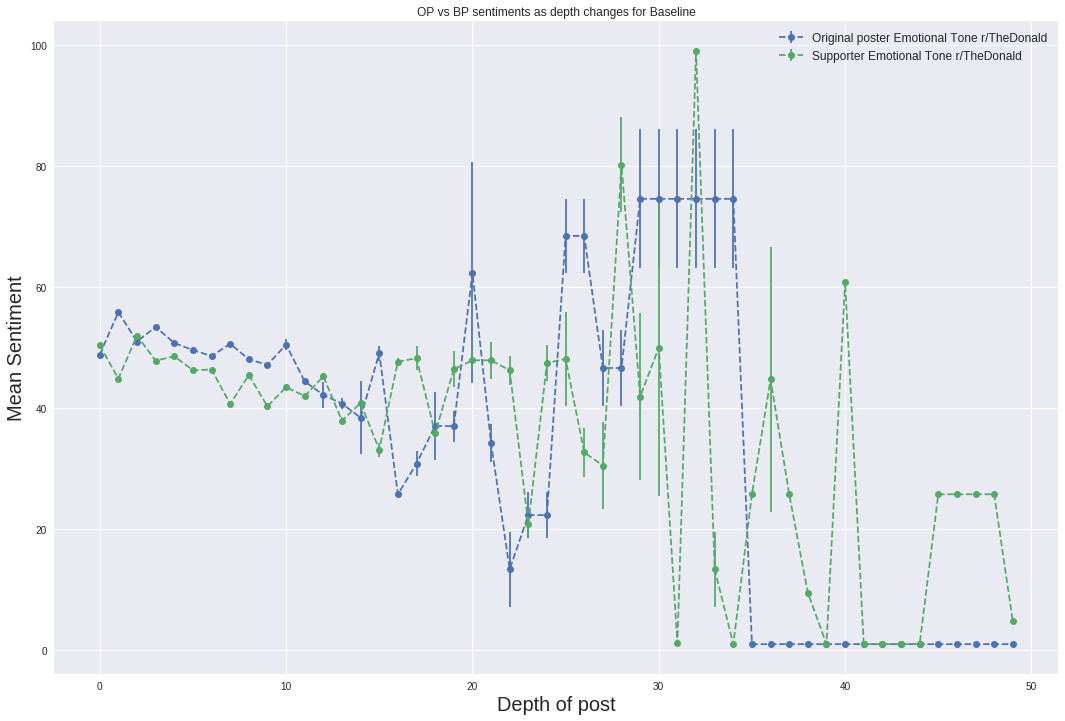

In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(0, 50, 1),BL_rootMean , yerr=BL_rootError, fmt='--o')
ax.errorbar(np.arange(0, 50, 1),BL_BPMean , yerr=BL_BPError, fmt='--o')
plt.title("OP vs BP sentiments as depth changes for Baseline")
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Sentiment" , fontsize = 20)
plt.legend(['Original poster Emotional Tone r/TheDonald' , 'Supporter Emotional Tone r/TheDonald'], fontsize=12)

In [131]:
triangleDist_SW = [sum(list(nx.triangles(filteredUGraphs_SW[k].to_undirected()).values()))/3 for k in filteredUGraphs_SW]
triangleDist_BL = [sum(list(nx.triangles(filteredUGraphs_BL[k].to_undirected()).values()))/3 for k in filteredUGraphs_BL]

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 9 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

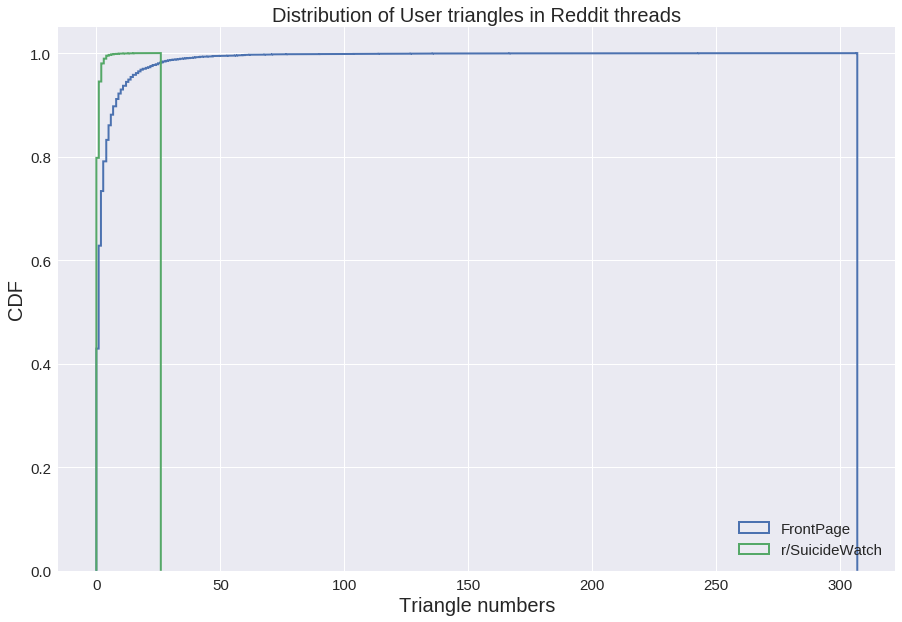

In [132]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(triangleDist_BL, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(triangleDist_SW, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Distribution of User triangles in Reddit threads", fontsize = 20)
plt.xlabel("Triangle numbers",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['FrontPage','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [133]:
print len(triangleDist_BL), len(triangleDist_SW)

stats , pvalue = findMannWhitney(triangleDist_BL , triangleDist_SW)
print stats , pvalue
normstats , normpvalue = findMannWhitney(triangleDist_BL , triangleDist_BL)
print stats/normstats, pvalue

11070 10527
32018365.5 0.0
Samples are same size, no need to resample
0.5225572912459026 0.0


In [134]:
isinstance(LIWC_SW.iloc[0]['B'],unicode)

False

In [135]:
# SW_Posts = []
# for index, row in LIWC_SW.iterrows():
#     SW_Posts.append(str(row['B']).decode("utf-8", "ignore"))
    


In [136]:
# len(SW_Posts)

In [137]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from gensim.models.ldamulticore import *
import gensim
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordTokenizer
import spacy
from spacy.lang.en import English
from __future__ import unicode_literals

In [135]:
class Tokenizer:
    def __init__(self):
#         print "Created Tokenizer"
        self.regExTknizr = RegexpTokenizer(r'\w+')
        self.tweetTknizr = TweetTokenizer()
        self.treebankTknizer = TreebankWordTokenizer()
        nlp = English()
#         self.spacytokenizer = English().Defaults.create_tokenizer(nlp)
        self.spacytokenizer = nlp.tokenizer
        
    def tokenizeByRegEx(self , text):
        return self.regExTknizr.tokenize(text)
    
    def tokenizeTweets(self,text):
        return self.tweetTknizr.tokenize(text)
    
    def simpleTokenizer(self, text):
        return text.strip().split()

    def gensimTokenizer(self , text):
        return gensim.utils.simple_tokenize(text)
    
    def wordTokenizer(self, text):
        return word_tokenize(text.strip())
    
    def treebankTokenize(self, text):
        return self.treebankTknizer.tokenize(text.strip())
    
    def spacyTokenize(self,text):
        return self.spacytokenizer(text.strip())

    
    
# create English stop words list
en_stop = get_stop_words('en')
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

def check(u1 , ulist):
    if u1 in ulist:
        return True
    else:
        return False

def getOPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if g.node[node]['author'] == users[k]:
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getBPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if k not in users:
                    continue
                if check(g.node[node]['author'],users[k]):
                    if g.node[node]['author'] in users[k]:
                        if g.node[node]['text'] == '[deleted]':
                            continue
                        texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getIRTexts(replyGraphs , op , bp):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if k not in op or k not in bp:
                    continue
                checkList = [op[k]] + bp[k]
                if not check(g.node[node]['author'],checkList):
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getAllText(replyGraphs):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'text' not in g.node[node]:
                print g.node[node]
                continue
            if g.node[node]['text'] == '[deleted]':
                continue
            texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def tokenizeTexts(testList):
    # list for tokenized documents in loop
    toc_texts = []
    # loop through document list
    tokenizer = Tokenizer()
    for i in testList:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.spacyTokenize(raw)
#         print tokens
        # remove stop words from tokens
        stopped_tokens = [i.orth_ for i in tokens if not i.orth_ in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        toc_texts.append(stemmed_tokens)
    return toc_texts

def tokenizeTextsSpacy(textList):
    toc_texts = []
    tokenizer = Tokenizer()
    for i in textList:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.spacyTokenize(raw)
        cleaned_tokens = [token.orth_ for token in tokens if not token.is_punct | token.is_space | token.is_stop ]
        toc_texts.append(cleaned_tokens)
    return toc_texts

def getTextTopicsSpacy(text,model):
    tokenizer = Tokenizer()
    raw = text.lower()
    tokens = tokenizer.spacyTokenize(raw)
    cleaned_tokens = [token.orth_ for token in tokens if not token.is_punct | token.is_space | token.is_stop ]
    topics = model.get_document_topics(dictionary.doc2bow(cleaned_tokens))
    return topics
        
def getTextTopics(text,model):
    raw = text.lower()
    tokenizer = Tokenizer()
    tokens = tokenizer.tokenizeByRegEx(raw)
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
#     print stemmed_tokens
    topics = model.get_document_topics(dictionary.doc2bow(stemmed_tokens))
    return topics

In [136]:
# len(opAuthors_SW), len(allGraphs_SW)

In [137]:
# SW_bpusers_all

In [138]:
print len(SW_bpusers_all)
# with open("BpUserDict.pkl",'wb') as f:
#     pkl.dump(SW_bpusers_all,f)

10527


In [139]:
Multiple_BP = {}
allUsers = []
for k in SW_bpusers_all:
    for u in SW_bpusers_all[k]:
        if u in allUsers:
            if u not in Multiple_BP:
                Multiple_BP[u] = 2
            else:
                Multiple_BP[u]+=1
        else:
            allUsers.append(u)
    
    

In [140]:
del Multiple_BP['[deleted]']

In [141]:
len(Multiple_BP)

2879

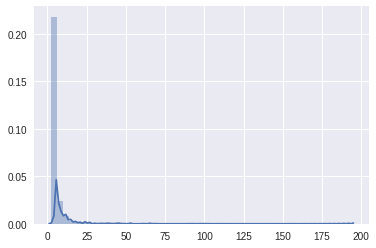

In [142]:
sns.distplot(Multiple_BP.values())

In [143]:
SW_multbpUsers = {}
for k in SW_bpusers_all:
    SW_multbpUsers[k] = []
    for m in SW_bpusers_all[k]:
        if m in Multiple_BP.keys():
            SW_multbpUsers[k].append(m)

In [144]:
# with open("multipleBP.pkl",'wb') as f:
#     pkl.dump(SW_multbpUsers,f)

In [145]:
len(SW_bpusers)

10527

In [146]:
SW_IR_posts = getIRTexts(filteredReply_SW,opAuthors_SW,SW_bpusers)

In [147]:
SW_Texts = getAllText(filteredReply_SW)

{}


In [148]:
BL_Texts = getAllText(filteredReply_BL)

In [149]:
len(filteredReply_BL),len(filteredReply_SW)

(11070, 10527)

In [150]:
len(SW_Texts),len(BL_Texts)

(206009, 859455)

In [151]:
SW_IR_posts[:4]

[u"Hey man....im glad you sound like you've found peace....but I'm sad that it had to be because of this and on these terms. there's always something to live for....you just have to really search sometimes. Im here if you'd like to chat. Hang in there man. :/ ",
 u'Sometimes you have to live first.....the death part comes later.http://www.youtube.com/watch?v=7_5A8Q_Tzc4',
 u'Yes but not 100\u2105 guaranteed to work',
 u"Damn bro, you definitely hit a few chords with me there.  I know that feeling of being down again and feeling like you have to start from scratch.  And I know that financial situation can make things seem hopeless.  What has always helped me was thinking of my nephew.  You need to stop telling yourself that your son is better off without you.  He won't.  Having a father that loves him and shows him is far more important than anything else.  As he gets older, he'll appreciate you even more that you survived this and made it through....and you will make it through.Think a

In [152]:
opAuthors_SW['pfn0u']

u'Heroic_Dose'

In [153]:
SW_OP_posts = getOPTexts(filteredReply_SW,opAuthors_SW)


In [154]:
len(SW_OP_posts)

82027

In [155]:
# SW_OP_posts[:10]

In [156]:
SW_BP_posts = getBPTexts(filteredReply_SW, SW_bpusers)

In [157]:
SW_MultBP_posts = getBPTexts(filteredReply_SW,SW_multbpUsers)

In [158]:
len(SW_MultBP_posts)

41191

In [159]:
len(SW_BP_posts)

83116

In [160]:
# SW_BP_posts[:10]

In [161]:
# sampled_SW_IR_Posts = random.sample(SW_IR_posts,len(SW_BP_posts))

In [162]:
len(SW_OP_posts) , len(SW_BP_posts)

(82027, 83116)

In [163]:
# OP_tokenized = tokenizeTexts(SW_OP_posts)
# BP_tokenized = tokenizeTexts(SW_BP_posts)
# IR_tokenized = tokenizeTexts(SW_IR_posts)

In [164]:
All_cleaned = tokenizeTexts(SW_Texts)

In [165]:
BL_cleaned = tokenizeTexts(BL_Texts)

In [166]:
# MultBP_tokenized = tokenizeTexts(SW_MultBP_posts)

In [167]:
len(All_cleaned) , len(BL_cleaned)

(206009, 859455)

In [168]:
# len(OP_tokenized) , len(BP_tokenized)

In [169]:
# OP_tokenized[1]

In [170]:
#turn our tokenized documents into a id <-> term dictionary
dictionary = gensim.corpora.Dictionary(All_cleaned)
# dictionary_BP =gensim.corpora.Dictionary(BP_tokenized)
# dictionary_IR =gensim.corpora.Dictionary(IR_tokenized)

In [171]:
dictionary_BL = gensim.corpora.Dictionary(BL_cleaned)

In [172]:
# len(dictionary_BP), len(dictionary_IR)
len(dictionary) , len(dictionary_BL)

(152791, 468018)

In [173]:
# len(dictionary_OP) , len(dictionary_BP)

In [174]:
# convert tokenized documents into a document-term matrix
# corpus_OP = [dictionary.doc2bow(text) for text in OP_cleaned_text]
# corpus_BP = [dictionary.doc2bow(text) for text in BP_tokenized]
# corpus_IR = [dictionary.doc2bow(text) for text in IR_tokenized]

In [175]:
All_SWcorpus = [dictionary.doc2bow(text) for text in All_cleaned]

In [176]:
All_BLcorpus = [dictionary_BL.doc2bow(text) for text in BL_cleaned]

In [177]:
# MultBP_corpus = [dictionary.doc2bow(text) for text in MultBP_tokenized]

# BP_tokenized[3]

# len(corpus_BP) , len(corpus_IR)

# len(corpus_BP)

# type(corpus_OP)

In [178]:
len(All_SWcorpus) , len(All_BLcorpus)

(206009, 859455)

In [179]:
sampled_corpus_SW = random.sample(All_SWcorpus,10000)
sampled_corpus_BL = random.sample(All_BLcorpus,10000)

In [180]:
# ldamodel = LdaMulticore(All_SWcorpus, id2word=dictionary, num_topics=40,workers=3) 
# ldamodel = gensim.models.ldamodel.LdaModel(sampled_corpus_SW, id2word=dictionary, num_topics=40) 

In [181]:
# ldamodel_BL = LdaMulticore(All_BLcorpus, id2word=dictionary_BL, num_topics=40,workers=3) 
# ldamodel_BL = gensim.models.ldamodel.LdaModel(sampled_corpus_BL, id2word=dictionary_BL, num_topics=100) 

In [ ]:
# generate LDA model
# ldamodel_OP = gensim.models.ldamodel.LdaModel(corpus_OP, num_topics=100, id2word = dictionary_OP, passes=20)
# ldamodel_OP = gensim.models.ldamodel.LdaModel(corpus_OP, id2word=dictionary, num_topics=50) 

# ldamodel_IR = gensim.models.ldamodel.LdaModel(corpus_IR, id2word=dictionary, num_topics=20) 



# ldamodel_BP = gensim.models.ldamodel.LdaModel(corpus_BP, num_topics=100, id2word = dictionary_BP, passes=20)
# ldamodel_BP = gensim.models.ldamodel.LdaModel(corpus_BP, id2word=dictionary, num_topics=10) 

# ldamodel[All_corpus[11]]

# ldamodel_MultBP = gensim.models.ldamodel.LdaModel(MultBP_corpus, id2word=dictionary, num_topics=10) 

In [182]:
ldamodel = gensim.models.ldamodel.LdaModel.load("TopicModels/SW_allcorpus_model_v5")
ldamodel_BL = gensim.models.ldamodel.LdaModel.load("TopicModels/BL_allcorpus_model_v5")

In [ ]:
# pyLDAvis.enable_notebook()
# topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel,corpus=sampled_corpus_SW,dictionary=dictionary)
# pyLDAvis.display(topic_display)

In [ ]:
# pyLDAvis.display(topic_display)

In [ ]:
# pyLDAvis.enable_notebook()
# topic_display_BL = pyLDAvis.gensim.prepare(topic_model=ldamodel_BL,corpus=sampled_corpus_BL,dictionary=dictionary_BL)

In [ ]:
# pyLDAvis.display(topic_display_BL)

In [ ]:
# ldamodel.save("SW_allcorpus_model_v3_new")

In [ ]:
# ldamodel_BL.save("BL_allcorpus_model_v3_new")

In [ ]:


# turn on automatic rendering of visualizations
# pyLDAvis.enable_notebook()
# bp_topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel_BP,corpus=corpus_BP,dictionary=dictionary)
# pyLDAvis.display(bp_topic_display)

In [ ]:
# turn on automatic rendering of visualizations
# pyLDAvis.enable_notebook()

# ir_topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel_IR,corpus=corpus_IR,dictionary=dictionary)
# pyLDAvis.display(ir_topic_display)

In [ ]:
# ldamodel_BP.print_topics(10)

# ldamodel_OP.print_topics(10)



In [ ]:
# ldamodel_IR.print_topics(10)

In [183]:
dictionary.values().index('harm')

126614

In [184]:
# ldamodel.save("SW_Alltext.mdl")

In [185]:
topics1 = getTextTopicsSpacy("hello there this is the captain speaking, we are about to crash land. Brace for impact",ldamodel)
topics2 = getTextTopicsSpacy("The captian of the plane goes down with the plane when it crashes",ldamodel)
topics3 = getTextTopicsSpacy("Hello everyone, we are not going to crash land. This is the captain", ldamodel)

In [186]:
print topics1, topics2 , topics3

[(27, 0.20184684), (30, 0.16122077), (46, 0.16749035), (51, 0.33372778)] [(38, 0.67083335)] [(27, 0.3455346), (30, 0.22928853), (51, 0.23267728)]


In [187]:
a = np.zeros(40)
a[10] = 100
print a

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


In [188]:
from scipy import spatial
def findJaccardTopicsMetric(topicarray1, topicarray2):
    topicidx1 = [k[0] for k in topicarray1]
    topicidx2 = [k[0] for k in topicarray2]
    intersection = len(list(set(topicidx1).intersection(topicidx2)))
    union = (len(topicidx1) + len(topicidx2)) - intersection
    if union == 0.0:
        return 0.0
    return float(intersection) / float(union)

def findEuclideanTopicsMetric(topicarray1, topicarray2,topicDimension=40):
    topicidx1 = np.zeros(topicDimension)
    topicidx2 = np.zeros(topicDimension)
    for k in topicarray1:
        topicidx1[k[0]] = k[1]
    for k in topicarray2:
        topicidx2[k[0]] = k[1]
    return 1.0001-spatial.distance.euclidean(topicidx1,topicidx2)

def findCosineTopicsMetric(topicarray1, topicarray2,topicDimension=40):
    topicidx1 = np.zeros(topicDimension)
    topicidx2 = np.zeros(topicDimension)
    for k in topicarray1:
        topicidx1[k[0]] = k[1]
    for k in topicarray2:
        topicidx2[k[0]] = k[1]
    return 1.0001 - spatial.distance.cosine(topicidx1,topicidx2)

In [190]:
print findEuclideanTopicsMetric(topics1 , topics2,topicDimension=80) , findEuclideanTopicsMetric(topics2,topics3,topicDimension=80) , findEuclideanTopicsMetric(topics1,topics3, topicDimension=80),

0.190051290154 0.177832716284 0.748021420463


In [191]:
print findCosineTopicsMetric(topics1 , topics2,topicDimension=80) , findCosineTopicsMetric(topics2,topics3,topicDimension=80) , findCosineTopicsMetric(topics1,topics3, topicDimension=80),

9.999999999998899e-05 9.999999999998899e-05 0.8540087836757406


In [192]:
import time
def createTopicalUserGraph(srcDestWeightList):
    userGraph = nx.DiGraph()
    for k in srcDestWeightList:
        src = k[0]
        dst = k[1]
        jaccard = k[2]
        
        if not userGraph.has_node(src):
            userGraph.add_node(src)
        if not userGraph.has_node(dst):
            userGraph.add_node(dst)  
        if not userGraph.has_edge(src,dst):
            userGraph.add_edge(src, dst , weight=jaccard )
        else:
            origWeight = userGraph[src][dst]['weight']
            update = float((origWeight + jaccard))/2.0
            userGraph[src][dst]['weight'] = update
    return userGraph
        
    
def createTopicGraphs(replyGraphs,ldaModel, topicDimensions, deletedUsers=None,logfile=None):
    topicGraphs = {}
    index = 0
    total = len(replyGraphs)
    for i in replyGraphs:
        index+=1
        start_t = time.time()
        deleted = nx.get_node_attributes(replyGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(replyGraphs[i],'author')
        texts = nx.get_node_attributes(replyGraphs[i],'text')
        srcDestWeightList = []
        for e in replyGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            
            if e[0] in texts and e[1] in texts:
                topicSrc = getTextTopicsSpacy(texts[e[0]].decode("utf-8", "ignore"),ldaModel)
                topicDest = getTextTopicsSpacy(texts[e[1]].decode("utf-8", "ignore"),ldaModel)
                jaccard = findEuclideanTopicsMetric(topicSrc, topicDest,topicDimension=topicDimensions)
            else:
                jaccard = 0.00001
            replyGraphs[i][e[0]][e[1]]['weight'] = jaccard
            srcDestWeightList.append((src,dst,jaccard))
        topicGraphs[i] = createTopicalUserGraph(srcDestWeightList)#userGraph
        end_t = time.time()
        print "executed graph in %f seconds"%(end_t-start_t)
        logging.debug("createTopicGraphs::executed %d th graph in %f seconds, total graph %d",index,float(end_t-start_t),total) 
    return topicGraphs
    

In [ ]:
# topicUserGraphs = createTopicGraphs(filteredReply_SW,ldamodel)

In [ ]:
# subsample = [k for k in allGraphs_BL of allGraphs_BL[k].nodes() > 4]
# sampled_BL = {}
# for k in subsample:
#     sampled_BL[k] = allGraphs_BL[k]

In [ ]:
# len(topicUserGraphs)

In [ ]:
#Save Topic Graphs: 
# with open("../Data/SW_TopicUgraphs_Cosine.pkl",'wb') as f:
#     pkl.dump(file=f , obj=topicUserGraphs)
# logging.debug("!!!Done writing SW topical Graphs!!!") 

In [ ]:
topicUserGraphs_BL = createTopicGraphs(filteredReply_BL,ldamodel_BL,topicDimensions=50)

executed graph in 14.565571 seconds
executed graph in 2.086537 seconds
executed graph in 1.488364 seconds
executed graph in 3.872271 seconds
executed graph in 25.779437 seconds
executed graph in 2.916799 seconds
executed graph in 26.019824 seconds
executed graph in 6.915205 seconds
executed graph in 11.179478 seconds
executed graph in 3.486205 seconds
executed graph in 4.078715 seconds
executed graph in 4.882814 seconds
executed graph in 1.001088 seconds
executed graph in 4.742201 seconds
executed graph in 9.380081 seconds
executed graph in 1.724594 seconds
executed graph in 29.634319 seconds
executed graph in 5.072812 seconds
executed graph in 4.702876 seconds
executed graph in 4.321952 seconds
executed graph in 5.521836 seconds
executed graph in 8.618049 seconds
executed graph in 5.196174 seconds
executed graph in 2.048298 seconds
executed graph in 1.770393 seconds
executed graph in 27.310888 seconds
executed graph in 3.343261 seconds
executed graph in 4.500561 seconds
executed graph

executed graph in 1.926295 seconds
executed graph in 6.323554 seconds
executed graph in 1.115034 seconds
executed graph in 4.071068 seconds
executed graph in 2.417055 seconds
executed graph in 6.812274 seconds
executed graph in 3.144557 seconds
executed graph in 1.389869 seconds
executed graph in 3.458538 seconds
executed graph in 1.961147 seconds
executed graph in 1.823548 seconds
executed graph in 10.760454 seconds
executed graph in 1.314789 seconds
executed graph in 3.406606 seconds
executed graph in 21.383849 seconds
executed graph in 30.066117 seconds
executed graph in 0.911940 seconds
executed graph in 1.126958 seconds
executed graph in 4.821578 seconds
executed graph in 5.175951 seconds
executed graph in 5.837165 seconds
executed graph in 7.957266 seconds
executed graph in 6.240399 seconds
executed graph in 1.876427 seconds
executed graph in 2.433410 seconds
executed graph in 4.381385 seconds
executed graph in 4.319740 seconds
executed graph in 0.915776 seconds
executed graph in

In [199]:
# #Save Topic Graphs: 
# with open("../Data/BL_TopicUgraphs_Cosine_V2.pkl",'wb') as f:
#     pkl.dump(file=f , obj=topicUserGraphs_BL)
# logging.debug("!!!Done writing BL topical Graphs!!!") 

In [200]:
#Save Reply Graphs: 
with open("../Data/BL_TopicReplygraphs_Cosine_V2.pkl",'wb') as f:
    pkl.dump(file=f , obj=filteredReply_BL)
logging.debug("!!!Done writing SW Reply Graphs!!!") 

In [ ]:
sizes = {}
for k in topicUserGraphs:
    sizes[k] = len(topicUserGraphs[k].nodes())

In [ ]:
import operator
max(sizes.iteritems(), key=operator.itemgetter(1))[0]

In [ ]:
nx.write_gexf(topicUserGraphs['dltcq'] , "LargestSW.gexf",encoding="utf-8",prettyprint=True)

In [ ]:
nx.write_gexf(filteredReply_SW['dltcq'] , "LargestSW_Repl.gexf",encoding="utf-8",prettyprint=True)

In [ ]:
# drawUserGraph(topicUserGraphs_BL['7yv9cz'])

In [ ]:
def createGiantTopicGraph(allGraphs,ldaModel,deletedUsers=None):
    userGraph = nx.DiGraph()
    for i in allGraphs:
        deleted = nx.get_node_attributes(allGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
#         userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        texts = nx.get_node_attributes(allGraphs[i],'text')
        for e in allGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            if e[0] in texts and e[1] in texts:
                topicSrc = getTextTopics(texts[e[0]].decode("utf-8", "ignore"),ldaModel)
                topicDest = getTextTopics(texts[e[1]].decode("utf-8", "ignore"),ldaModel)
                jaccard = findJaccardTopicsMetric(topicSrc , topicDest)
            else:
                jaccard = 0.0
            
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=jaccard )
            else:
                origWeight = userGraph[src][dst]['weight']
                update = (origWeight + jaccard)
                userGraph[src][dst]['weight'] = update
    return userGraph

In [ ]:
# giantTopicGraph = createGiantTopicGraph(allGraphs_SW,ldamodel)

In [ ]:
def findWeightimbalance(graphs, userDict):
    userBalance = []
    reflectiveBalance = []
    for k in userDict:
        if len(userDict[k]) > 0:
            for u in userDict[k]:
                inEdges = graphs[k].in_edges(u,data=True)
                outEdges = graphs[k].out_edges(u,data=True)
                if len(inEdges) > 0 and len(outEdges) > 0:
                    inWeight = float(sum([e[2]['weight'] for e in inEdges]))/float(len(inEdges))
                    outWeight =float(sum([e[2]['weight'] for e in outEdges]))/float(len(outEdges))
                    if inWeight == 0.0:
                            continue
                    userBalance.append(outWeight/inWeight)
            for u in graphs[k].nodes():
                if u not in userDict[k]:
                    inEdges = graphs[k].in_edges(u,data=True)
                    outEdges = graphs[k].out_edges(u,data=True)
                    if len(inEdges) > 0 and len(outEdges) > 0:
                        inWeight = float(sum([e[2]['weight'] for e in inEdges]))/float(len(inEdges))
                        if inWeight == 0.0:
                            continue
                        outWeight =float(sum([e[2]['weight'] for e in outEdges]))/float(len(outEdges))
                        reflectiveBalance.append(outWeight/inWeight)
    return userBalance, random.sample(reflectiveBalance,len(userBalance))

            

In [ ]:
BP_balance, genericUserBalance = findWeightimbalance(topicUserGraphs,SW_bpusers_all)

In [ ]:
BL_balance, genericUserBalanceBL = findWeightimbalance(topicUserGraphs_BL , BL_bpusers)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BP_balance, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(genericUserBalanceBL, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Distribution of User triangles in Reddit threads", fontsize = 20)
plt.xlabel("Triangle numbers",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['BP Topics','Random user Topics'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [ ]:
# degrees = nx.degree_histogram(giantTopicGraph)

In [ ]:
# print degrees

In [ ]:
clusteringSW = {}
for k in topicUserGraphs:
    SW_clustering = nx.clustering(topicUserGraphs[k].to_undirected())
    clusteringSW[k] = SW_clustering

In [ ]:
BP_clustering = []

for k in clusteringSW:
    if len(SW_bpusers_all[k]) > 0:
        for u in SW_bpusers_all[k]:
            BP_clustering.append(clusteringSW[k][u])

In [ ]:
sns.distplot(BP_clustering)

In [ ]:
#Save Giant Topic Graph: 
# with open("../Data/SW_GiantTopicGraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=giantTopicGraph)

In [ ]:
# nx.write_gpickle(giantTopicGraph,"../../node2vec/graph/SW_GiantTopicGraph.gpkl")
# nx.write_gexf(giantTopicGraph,"../Data/topicGraph.gexf")

In [ ]:
len(giantTopicGraph.nodes())

In [ ]:
opTexts = []
responseTexts = []
for k in convChainsSW:
    op = convChainsSW[k]['op']
    bp = convChainsSW[k]['bp']
    for p in op:
        opTexts.append(p['text'].decode("utf-8", "ignore"))
    for p in bp:
        responseTexts.append(p['text'].decode("utf-8", "ignore"))
    

SW_sampled_MultBP_posts = random.sample(SW_MultBP_posts,len(SW_IR_posts)

len(SW_sampled_MultBP_posts)

opCleaned = tokenizeTexts(SW_IR_posts)
bpCleaned = tokenizeTexts(SW_sampled_MultBP_posts)

len(opCleaned), len(bpCleaned)

# op_corpus = [dictionary.doc2bow(text) for text in opCleaned]
# bp_corpus = [dictionary.doc2bow(text) for text in bpCleaned]

IR_corpus = [dictionary.doc2bow(text) for text in opCleaned]

response_corpus = [dictionary.doc2bow(text) for text in bpCleaned]

SW_IR_posts[1]

SW_sampled_MultBP_posts[50]

ldamodel.get_document_topics(IR_corpus[50])

ldamodel.get_document_topics(bp_corpus[50])

from empath import Empath
dimensions = ["health","suffering" , "hate", "aggression", "sympathy", "listen", "disgust", "help","negative_emotion" ,"positive_emotion"]
def corpustoVectors(model , corpus , origText ,label):
    if len(corpus) != len(origText):
        print " Something is wrong, BOW corpus size should be same as original text size"
        
    lexicon = Empath()
    featureVectors = [] 
    for c in range(len(corpus)):
        topics = model.get_document_topics(corpus[c])
        affects = lexicon.analyze(origText[c],categories=dimensions,  normalize=True)
#         affects = lexicon.analyze(origText[c],  normalize=True)
#         print len(affects)
        if affects == None:
#             affvec = np.asarray([0.0 for k in range(194)])
            affvec = np.asarray([0.0 for k in range(10)])
        else:
            affvec = np.asarray([affects[k] for k in affects])
        topvec = np.zeros(21)
        for t in topics:
            topvec[t[0]] = t[1]
        topvec[-1] = label
        finalVec = np.append(affvec,topvec)
        featureVectors.append(finalVec.T)
    return featureVectors

opFeats = corpustoVectors(ldamodel,IR_corpus,SW_IR_posts, 1.0)

len(opFeats) , len(opFeats[1])

bpFeats = corpustoVectors(ldamodel,response_corpus,SW_sampled_MultBP_posts,0.0)

len(bpFeats) , len(bpFeats[1])

print bpFeats[1][-1], opFeats[1][-1]

totFeats = opFeats + bpFeats
len(totFeats) , len(totFeats[1])

featMatrix = np.asmatrix(totFeats)

featMatrix.shape

np.random.shuffle(featMatrix)

from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

X_train, X_test, y_train, y_test = cross_validation.train_test_split(featMatrix[:,:-1], featMatrix[:,-1], test_size=0.1, random_state=0)
clfRF = RandomForestClassifier(n_estimators=10000 , max_features = 'sqrt', random_state = 9386, n_jobs=12)
clfRF.fit(X_train, y_train)
RF_predict = clfRF.predict(X_test)

precision , recall , fscore , _ = precision_recall_fscore_support(y_test, RF_predict, average='binary')

print precision,recall,fscore

accuracy_score(y_test , RF_predict)

from sklearn.svm import LinearSVC

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(50, 20), random_state=1)
clf.fit(X_train, y_train)

SVM_predict = clfRF.predict(X_test)

MLP_Predict = clf.predict(X_test)
precision , recall , fscore , _ = precision_recall_fscore_support(y_test, SVM_predict, average='binary')
print precision,recall,fscore

topics = ldamodel.print_topics(128)

topics[1:10]